In [755]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from scipy.stats import shapiro
from warnings import filterwarnings
filterwarnings('ignore')

In [756]:
# reading the dataset
data = pd.read_csv('co2_emissions (1).csv', sep = ';')

In [757]:
data.head(8)

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   
5  ACURA         RLX      MID-SIZE          3.5          6           AS   
6  ACURA          TL      MID-SIZE          3.5          6           AS   
7  ACURA      TL AWD      MID-SIZE          3.7          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   
5         Z                   11.9                   7.7   
6         Z                   11.8                   8.1   
7         Z                   12.8                   9.0   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244  
5                            10.0                          28            230  
6                            10.1                          28            232  
7                            11.1                          25            255

In [758]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

# Exploratory Data Analysis

Preparing the Dataset

In [759]:
#Data Dimensions
data.shape

(7385, 12)

In this dataset we have 7385 records across 12 features

In [760]:
#data types
data.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

The dataset contains 5 object columns, 3 int column and 4 float columns

In [761]:
#Missing Values
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})

In [762]:
missing_value.sort_values(by='Percentage', ascending=False)

Missing Value  Percentage
make                                        0         0.0
model                                       0         0.0
vehicle_class                               0         0.0
engine_size                                 0         0.0
cylinders                                   0         0.0
transmission                                0         0.0
fuel_type                                   0         0.0
fuel_consumption_city                       0         0.0
fuel_consumption_hwy                        0         0.0
fuel_consumption_comb(l/100km)              0         0.0
fuel_consumption_comb(mpg)                  0         0.0
co2_emissions                               0         0.0

There are no missing values present in this dataset

In [763]:
#Duplicate Data
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1112 duplicated rows in the data


In [764]:
data.drop_duplicates(inplace=True)

In [765]:
data.reset_index(inplace=True, drop=True)

In [766]:
data.shape

(6273, 12)

Now, the dataset has 6273 records and 12 features with no missing and duplicate values

# Data Understanding

 Summary Statistics

In [767]:
data.describe(include=np.number)

engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  6273.000000  6273.000000            6273.000000           6273.000000   
mean      3.163000     5.620596              12.615591              9.073426   
std       1.365294     1.846424               3.550572              2.277893   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.700000             10.300000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     6273.000000                 6273.000000   
mean                        11.022111                   27.395026   
std                          2.945028                    7.225472   
min                          4.100000                   11.000000   
25%                          8.900000                   22.000000   
50%                         10.600000                   27.000000   
75%                         12.700000                   32.000000   
max                         26.100000                   69.000000   

       co2_emissions  
count    6273.000000  
mean      251.247250  
std        59.235396  
min        96.000000  
25%       208.000000  
50%       246.000000  
75%       289.000000  
max       522.000000

1.The average amount of CO2 emitted from cars is 251 g/km
2.Atleast 4 Litres of fuel is consumed be it the car is on city roads or highway
3.About 75% of the cars have 6 or less cylinders
4.The amount of fuel consumed by cars on city roads is comparitvely greater than that of highway

In [768]:
data.describe(include = object)

make      model vehicle_class transmission fuel_type
count   6273       6273          6273         6273      6273
unique    42       2053            16            5         5
top     FORD  F-150 FFV   SUV - SMALL           AS         X
freq     575         32          1004         2720      3030

1.There are a total of 42 different car companies with 2053 different car models
2.Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most
3.4 different types of fuels used by cars have been identified and fuel X seems to be the most famous
4.Most of the cars have AS transmission

# Correlation

In [769]:
data_num_features = data.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')


Text(0.5, 1.0, 'Correlation')

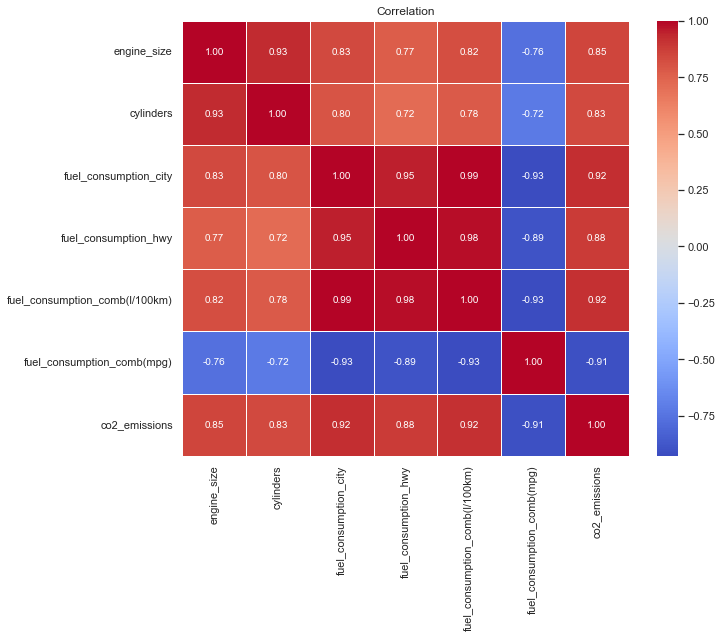

In [770]:
corr = data.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

# FREQUENCY DISTRIBUTION OF DIFFFRENT FEATURES

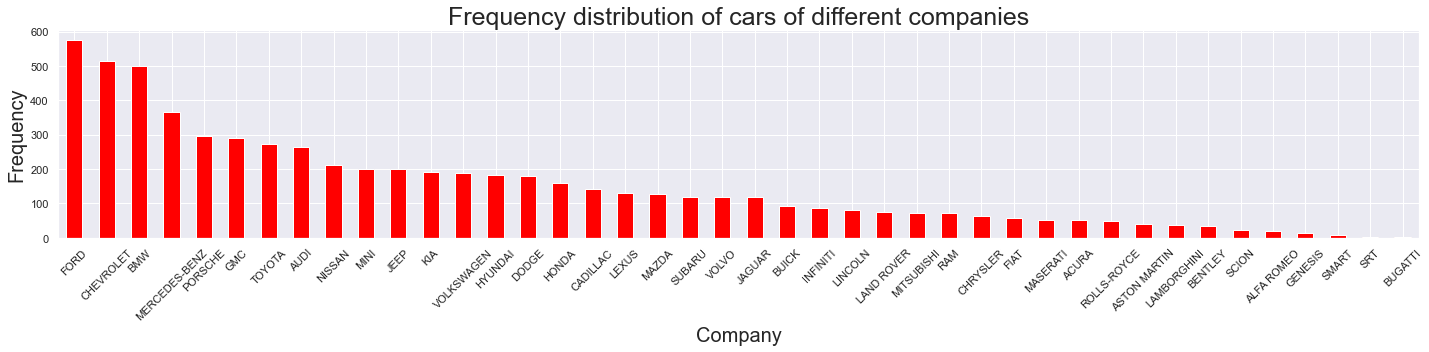

In [771]:
# MAKE
plt.figure(figsize=(20,5))

data.groupby('make')['make'].count().sort_values(ascending=False).plot(kind='bar',color='red')

plt.title('Frequency distribution of cars of different companies', fontsize=25)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

most no of   cars are made by ford

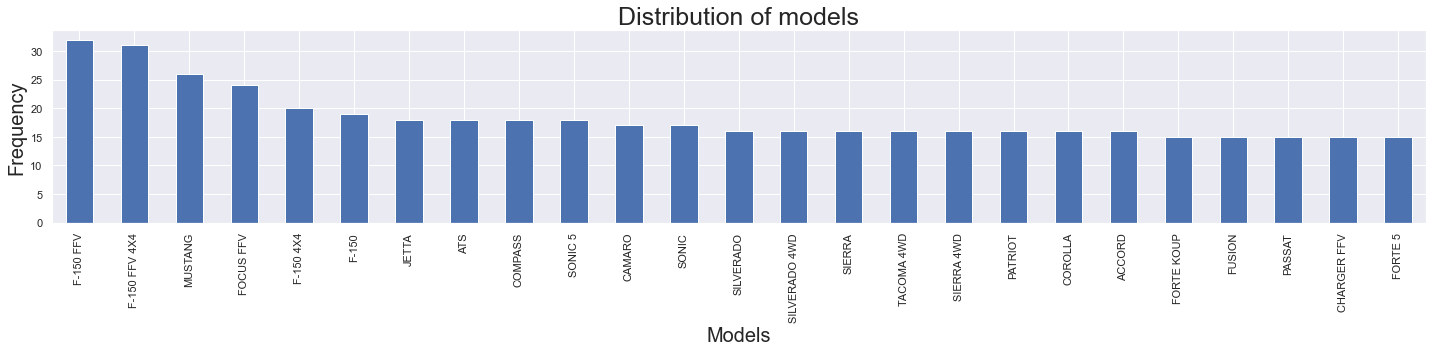

In [772]:
# MODEL
plt.figure(figsize=(20,5))

data.groupby('model')['model'].count().sort_values(ascending=False)[:25].plot(kind='bar')

plt.title('Distribution of models', fontsize=25)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The F-150 FFV is amongst the most famous model

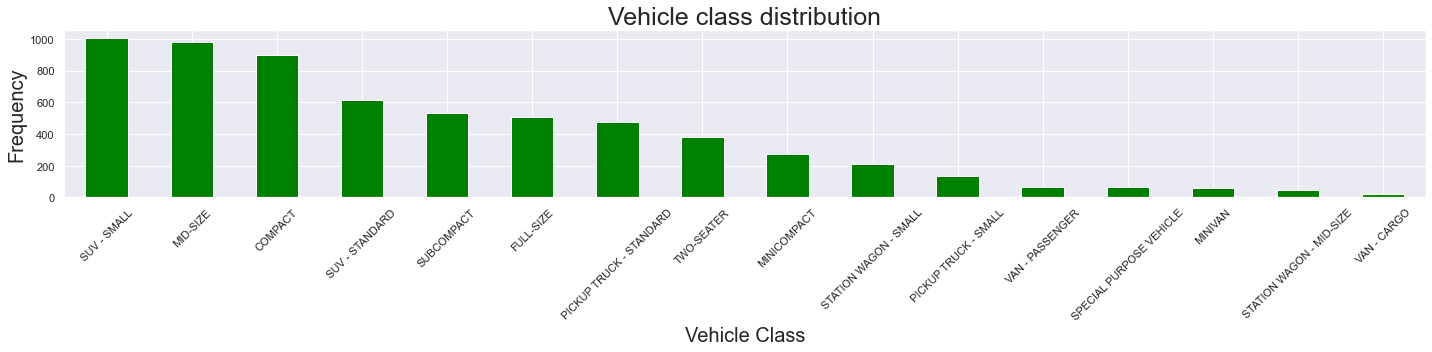

In [773]:
# Vehicle Class

plt.figure(figsize=(20,5))

data.groupby('vehicle_class')['vehicle_class'].count().sort_values(ascending=False).plot(kind='bar', color='green')

plt.title('Vehicle class distribution', fontsize=25)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

SUV-Small is the preferred class of vehicle 

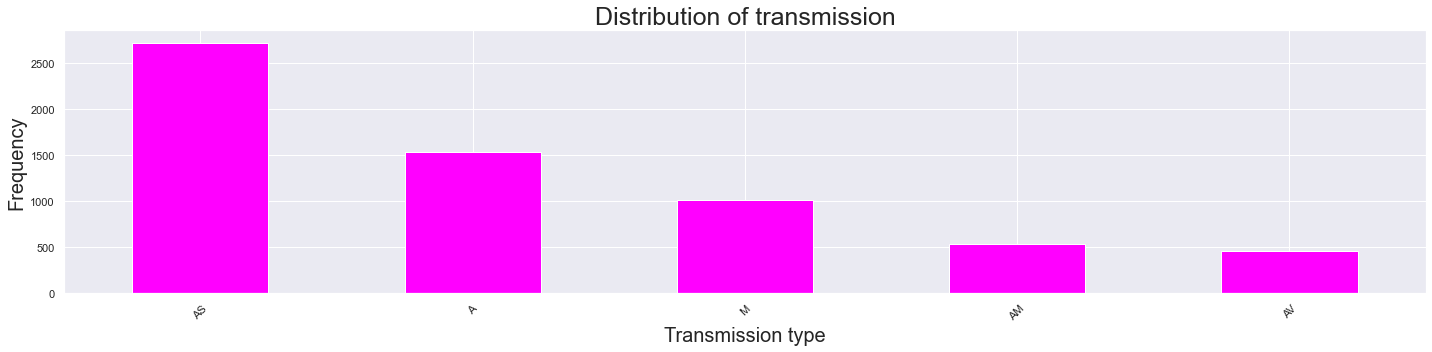

In [774]:
# Transmission

plt.figure(figsize=(20,5))

data.groupby('transmission')['transmission'].count().sort_values(ascending=False).plot(kind='bar', color='magenta')

plt.title('Distribution of transmission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 More than 1400 cars have AS and A transmission types

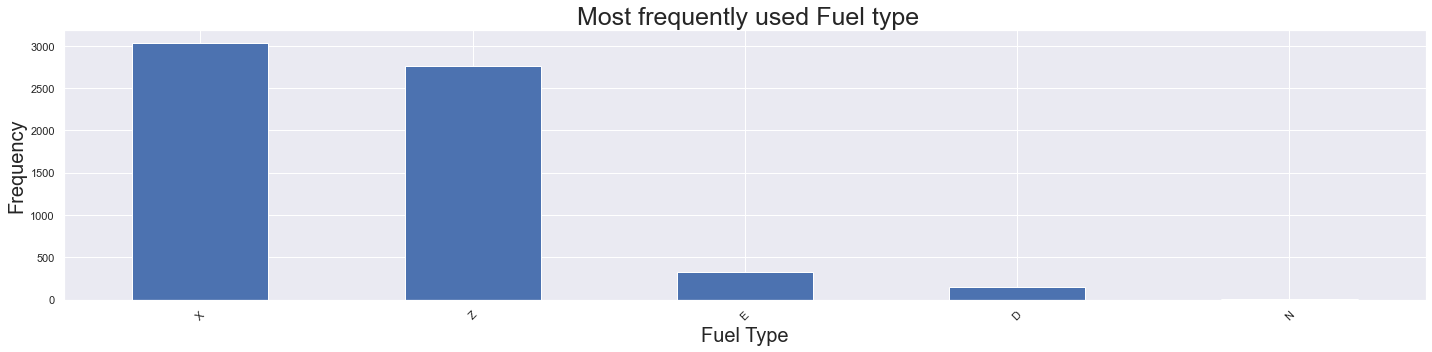

In [775]:
# Fuel Type

plt.figure(figsize=(20,5))

data.groupby('fuel_type')['fuel_type'].count().sort_values(ascending=False).plot(kind='bar')

plt.title(' Most frequently used Fuel type', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Majority of the cars  use Fuel type X and Z

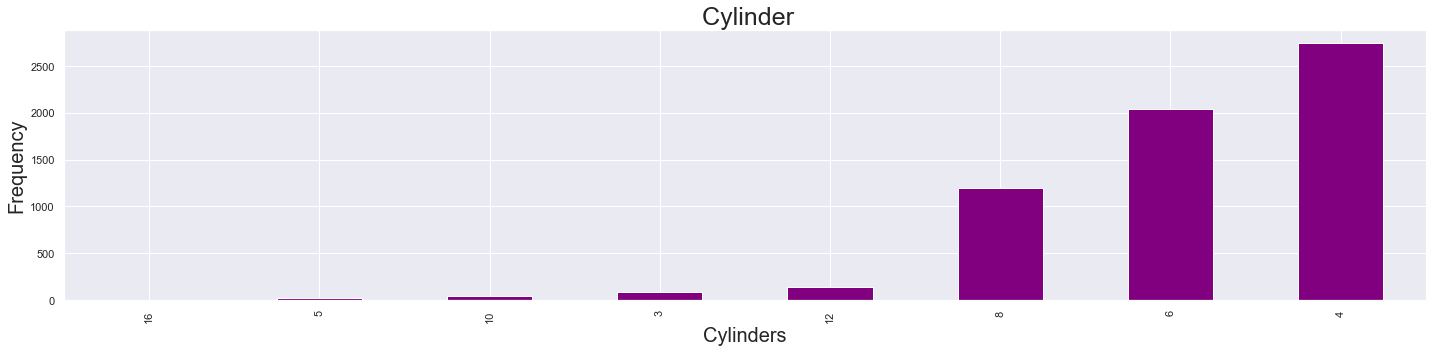

In [776]:
# Cylinders

plt.figure(figsize=(20,5))

data.groupby('cylinders')['cylinders'].count().sort_values(ascending=True).plot(kind='bar', color='purple')

plt.title(' Cylinder', fontsize=25)
plt.xlabel('Cylinders', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

most of the cars have 4 cylinders

# Analyse Target Variable

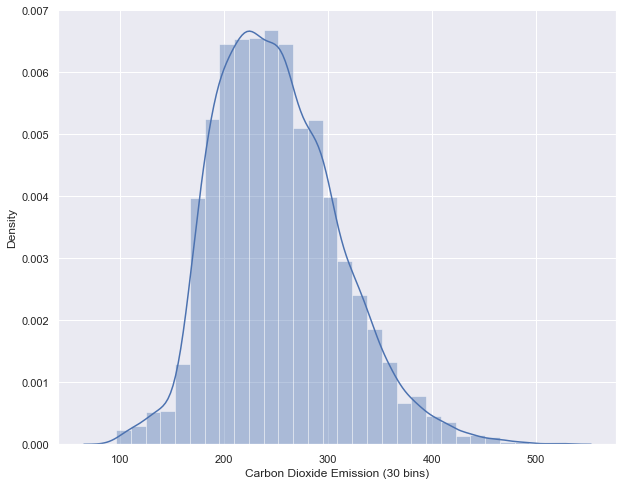

In [777]:
sns.distplot(data['co2_emissions'], bins=30, kde=True, axlabel='Carbon Dioxide Emission (30 bins)')
plt.show()

From the above histogram, we can see that CO2_Emissions is moderately positive skewed

In [778]:
mean = data['co2_emissions'].mean()
mode = data['co2_emissions'].mode()
median = data['co2_emissions'].median()

print(f'Mean for CO2 Emission is {mean}')
print(f'Median for CO2 Emission is {median}')
print(f'Mode for CO2 Emission is {mode}')

Mean for CO2 Emission is 251.24725011956002
Median for CO2 Emission is 246.0
Mode for CO2 Emission is 0    221
1    246
Name: co2_emissions, dtype: int64


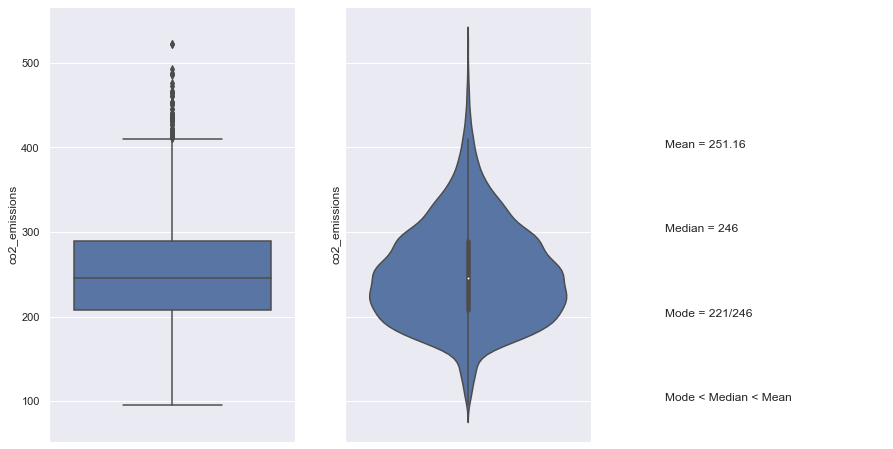

In [779]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,8))
sns.boxplot(y=data['co2_emissions'], orient="v", ax = axes[0])
sns.violinplot(y=data['co2_emissions'], orient="v", ax = axes[1]);
plt.text(0.1, 200, "Mode = 221/246", fontsize=12)
plt.text(0.1, 300, "Median = 246", fontsize=12)
plt.text(0.1, 400, "Mean = 251.16", fontsize=12)
plt.text(0.1, 100, "Mode < Median < Mean", fontsize=12)
plt.axis("off")
plt.show()

Of all the three statistics, the mean is the largest, while the mode is the smallest thus CO2_Emissions is positively skewed which implies that most of the CO2 Emissions are less than the average CO2 Emissions.

# FEATURE DISTRIBUTION WITH RESPECT TO CO2 EMISSION

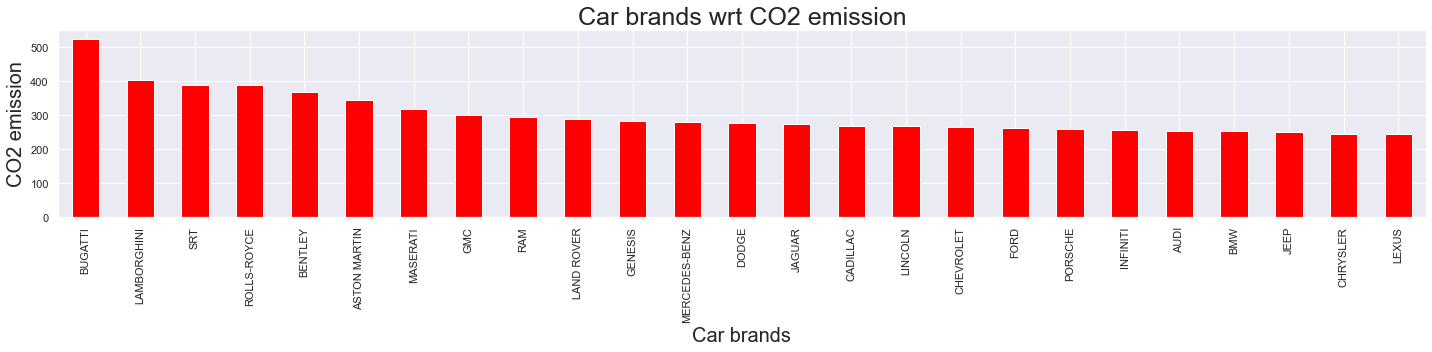

In [780]:
# Visualisation wrt CO2 emision

plt.figure(figsize=(20,5))

data.groupby('make')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')

plt.title('Car brands wrt CO2 emission', fontsize=25)
plt.xlabel('Car brands', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 CO2 Emissions v/s Make : While Ford cars are mainly found on the roads  but  its Bugatti that emit the most CO2 per car

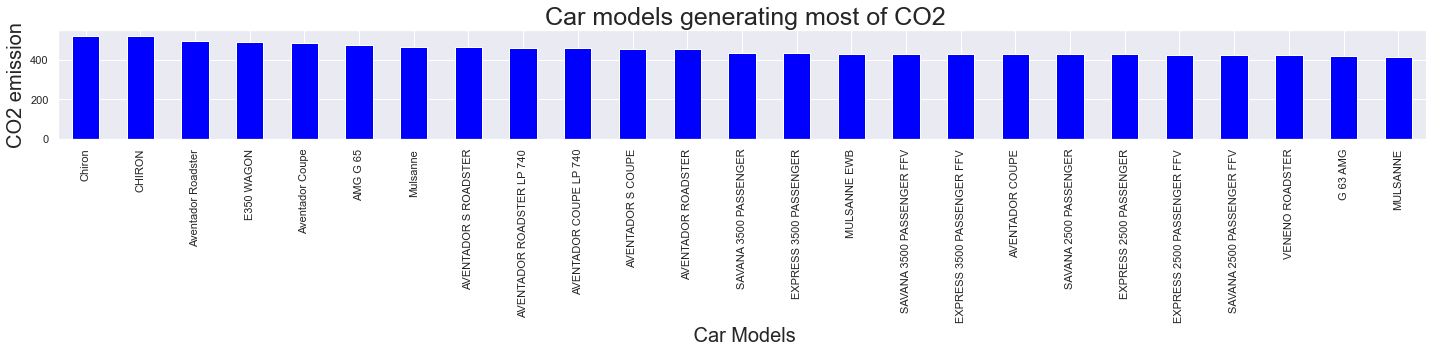

In [781]:
plt.figure(figsize=(20,5))

data.groupby('model')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='blue')

plt.title(' Car models generating most of CO2', fontsize=25)
plt.xlabel(' Car Models', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CO2 Emissions v/s Model: Bugatti Chiron is amongst the most CO2 emitting car model

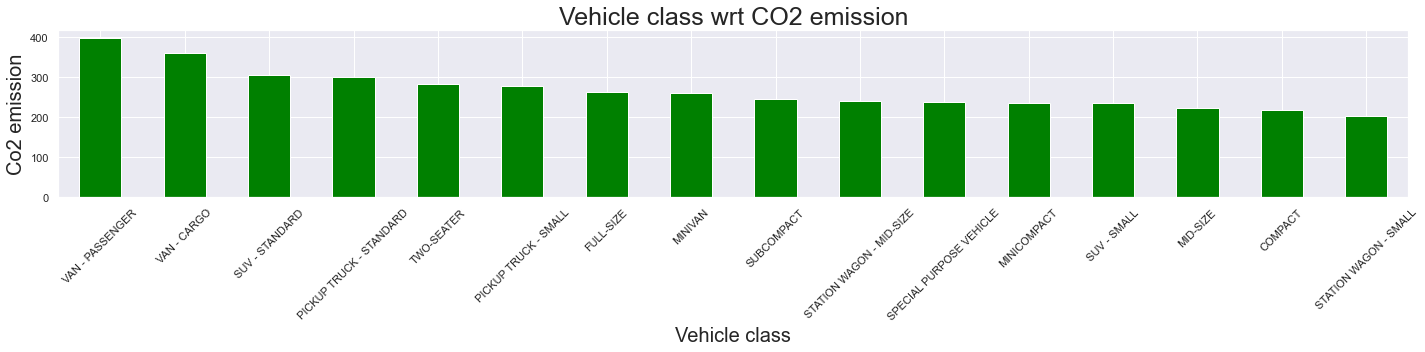

In [782]:
plt.figure(figsize=(20,5))

data.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='green')

plt.title('Vehicle class wrt CO2 emission', fontsize=25)
plt.xlabel('Vehicle class' , fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CO2 Emissions v/s Vehicle_Class: Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2

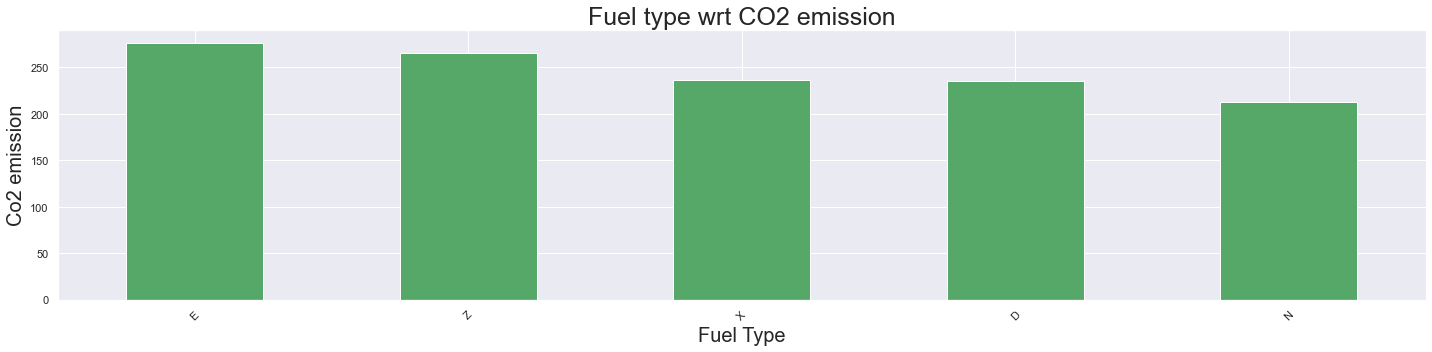

In [783]:
plt.figure(figsize=(20,5))

data.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='g')

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CO2 Emissions v/s Fuel_Type: Cars using Fuel Type E and z are emitting the most CO2

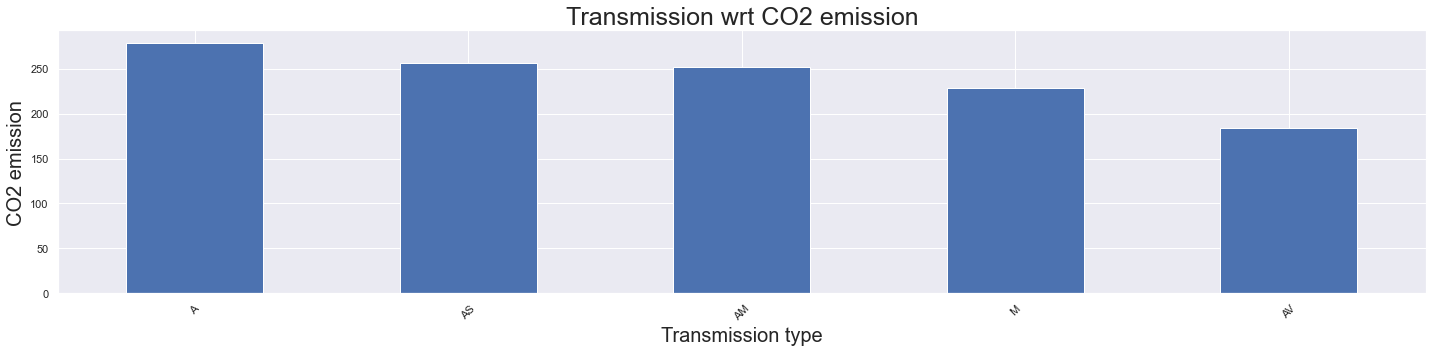

In [784]:
plt.figure(figsize=(20,5))

data.groupby('transmission')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Transmission wrt CO2 emission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CO2 Emissions v/s Transmission: Most of the cars with automatic transmission emit more CO2

<Figure size 720x576 with 0 Axes>

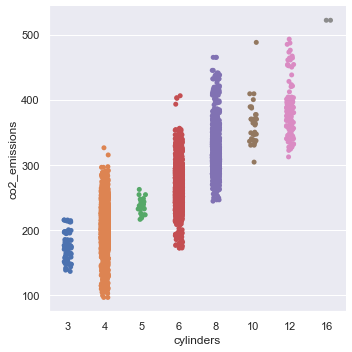

In [785]:
plt.figure(figsize=(10,8))

sns.catplot(x='cylinders', y='co2_emissions',data = data)

plt.show()       

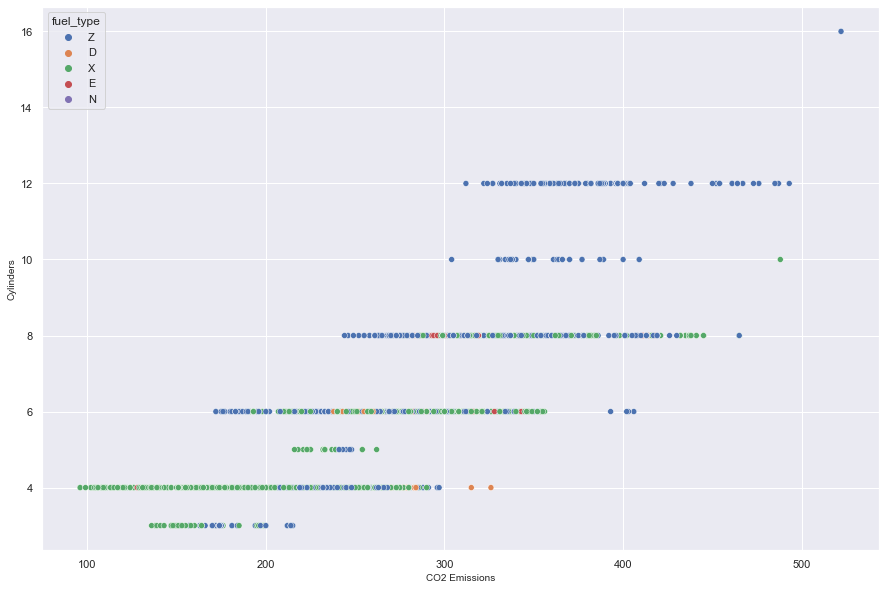

In [786]:
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot('co2_emissions','cylinders',data = data,hue='fuel_type')
plt.xlabel("CO2 Emissions", fontsize=10)
plt.ylabel("Cylinders", fontsize=10)
plt.show()

From the above scatter plot we can see that:

As the number of cylinders increase, the CO2 emissions increase Cars with 8 and less than 8 cylinders prefer using Fuel Type X which result in less emissions of CO2 Fuel Type Z results in more CO2 emissions than the others

# AUTOMATED EDA

# D-Tale

In [787]:
!pip install dtale
import dtale
dtale.show(data)

# Sweetviz and Pandas profiling

In [788]:
!pip install sweetviz
!pip install pandas_profiling
!pip install markupsafe

In [789]:
import sweetviz as sv
sweet_report=sv.analyze(data)
sweet_report.show_html('stock_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report stock_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [790]:
import pandas_profiling as pan_prof
stock_report=pan_prof.ProfileReport(data)
stock_report.to_file(output_file='report.html')
stock_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Discovery of Outliers

In [791]:
df_num_features=data.select_dtypes(include=np.number)

In [792]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

engine_size                        1.7
cylinders                          2.0
fuel_consumption_city              4.6
fuel_consumption_hwy               2.8
fuel_consumption_comb(l/100km)     3.8
fuel_consumption_comb(mpg)        10.0
co2_emissions                     81.0
dtype: float64


In [793]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column engine_size are 121
Total number of Outliers in column cylinders are 177
Total number of Outliers in column fuel_consumption_city are 116
Total number of Outliers in column fuel_consumption_hwy are 150
Total number of Outliers in column fuel_consumption_comb(l/100km) are 115
Total number of Outliers in column fuel_consumption_comb(mpg) are 93
Total number of Outliers in column co2_emissions are 74


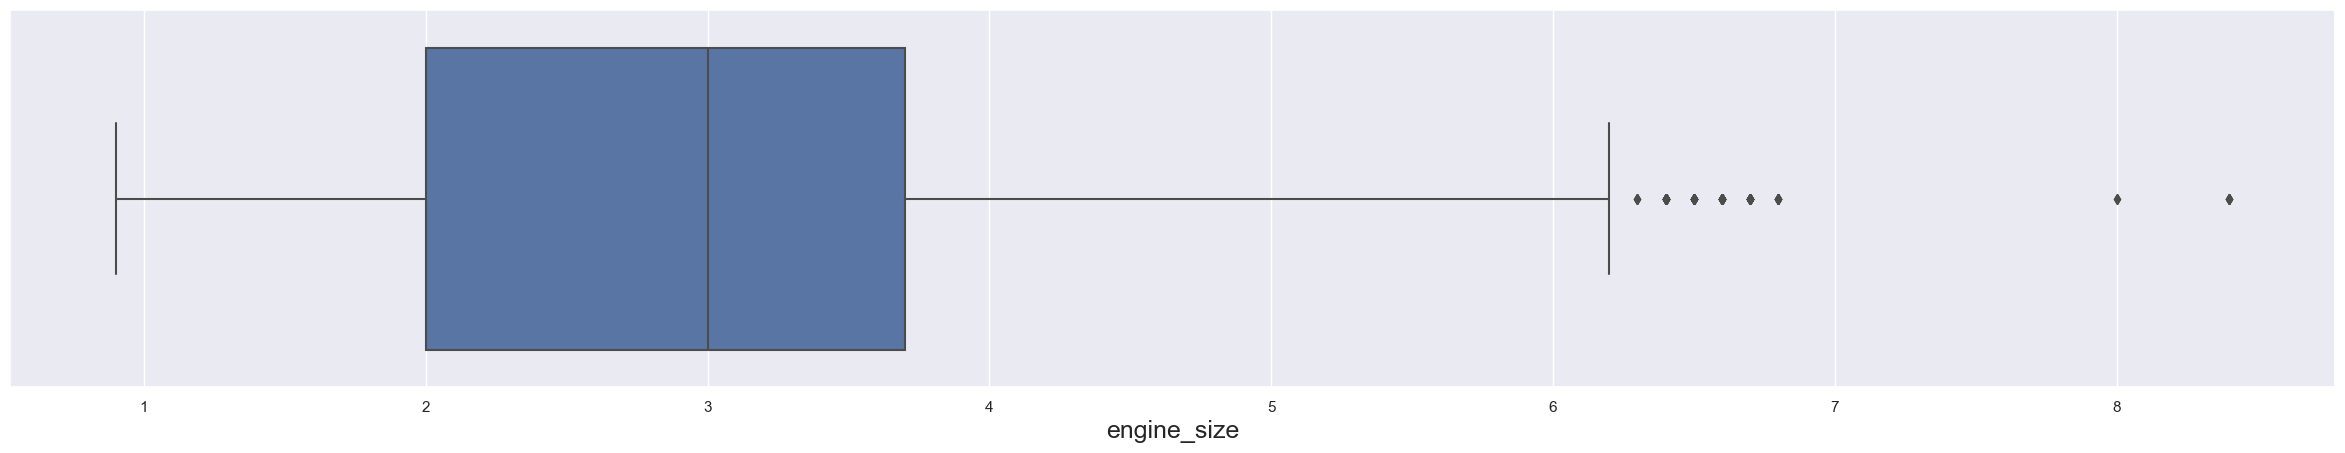

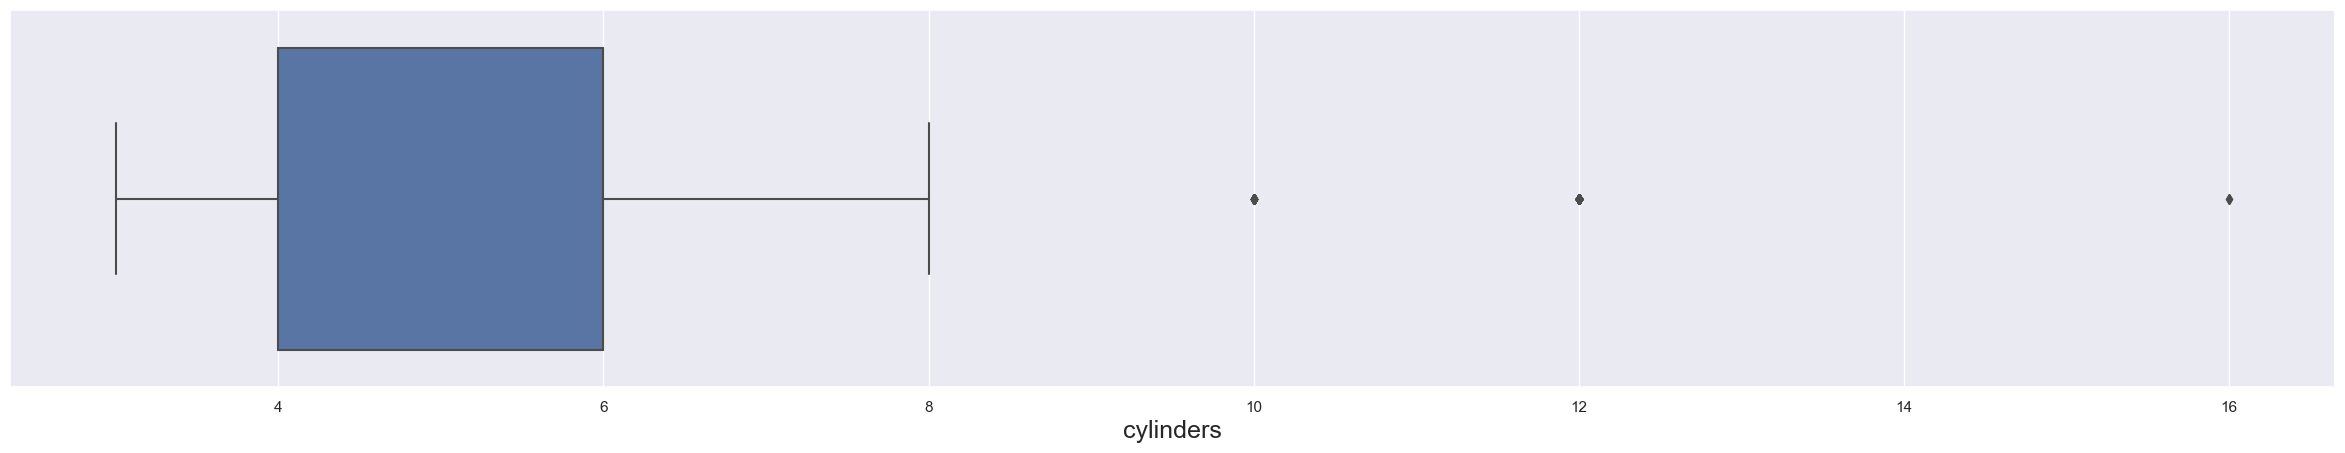

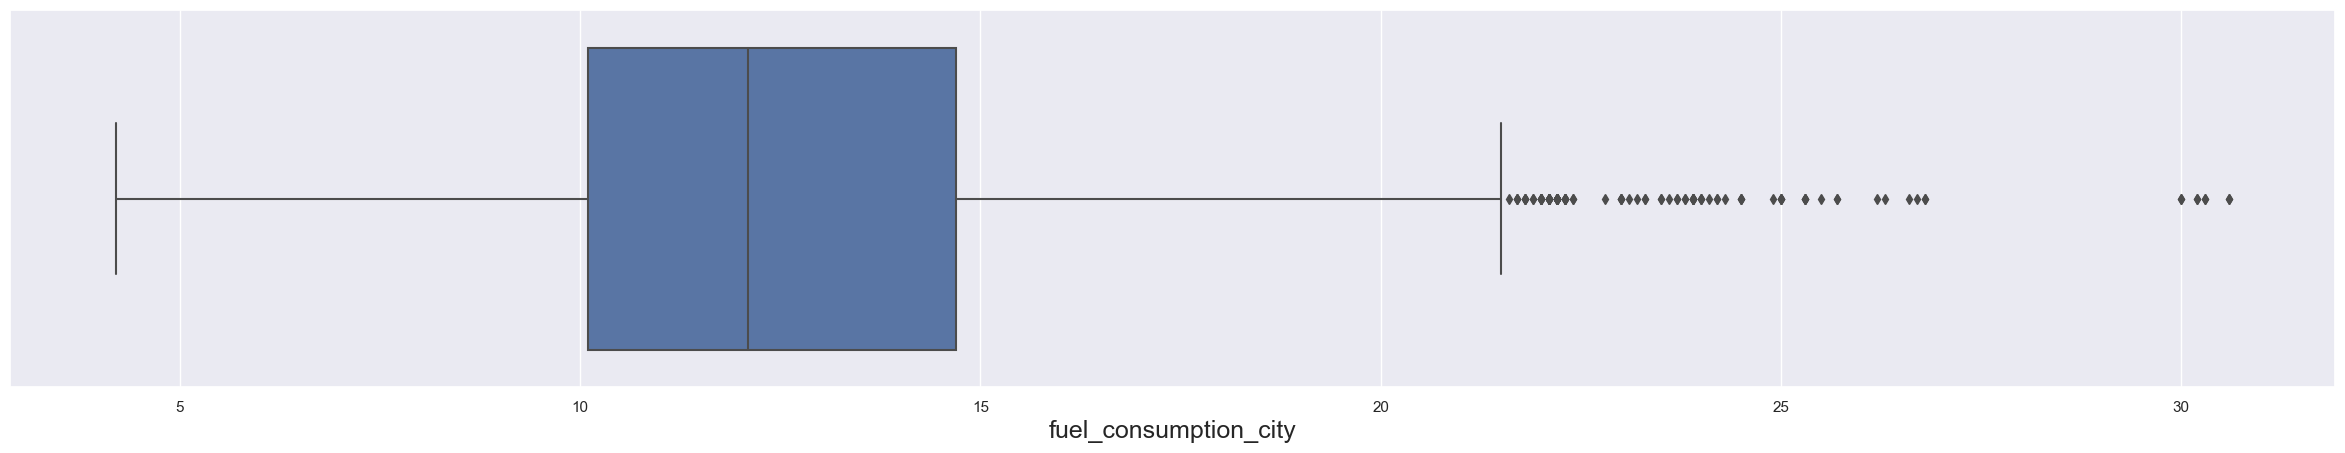

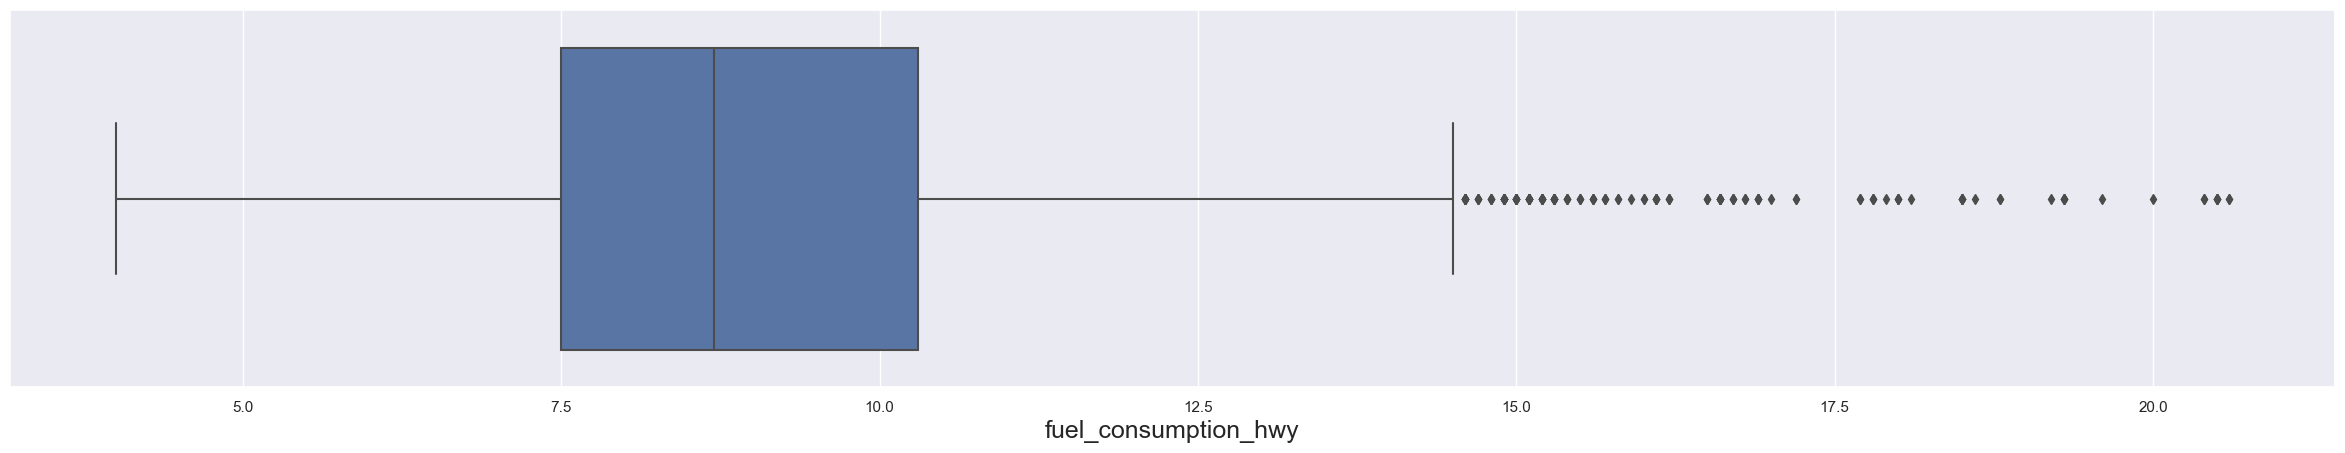

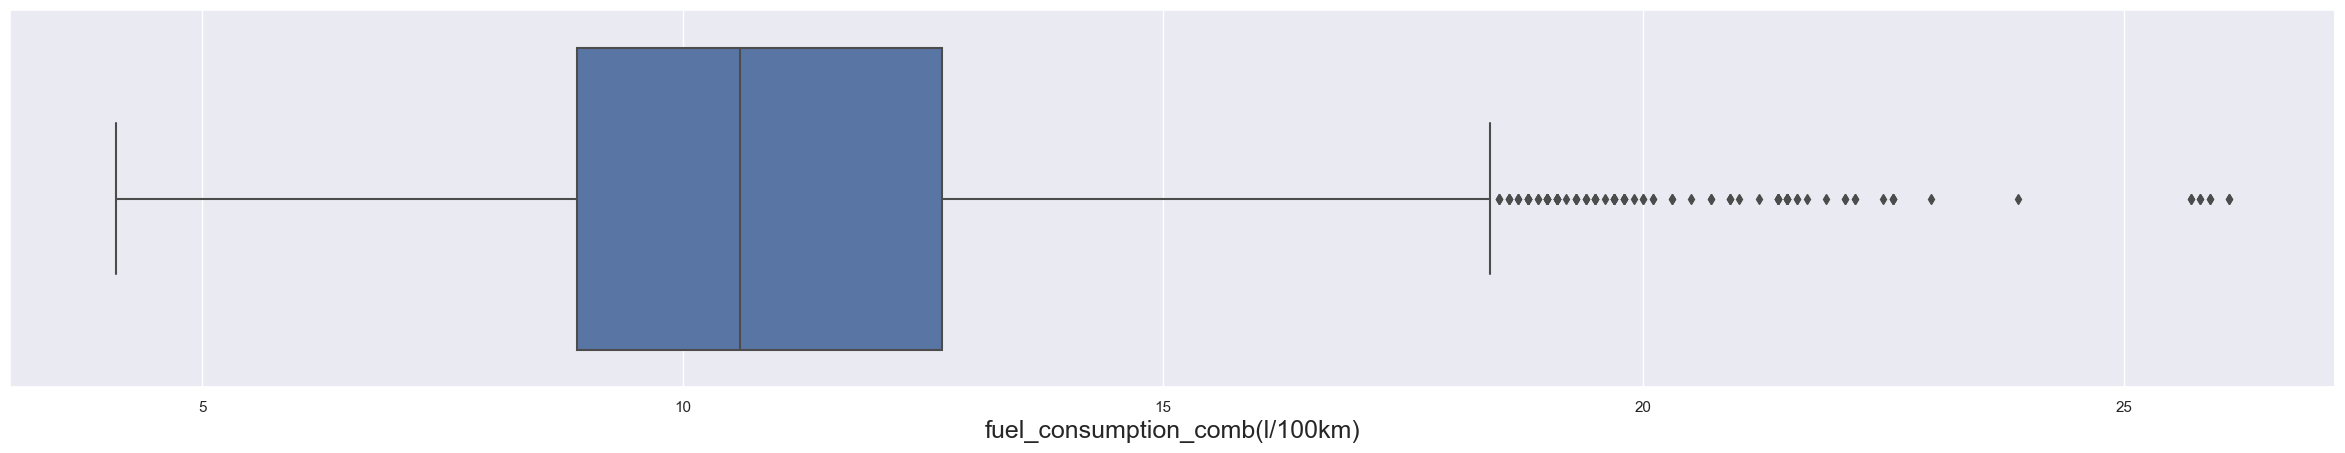

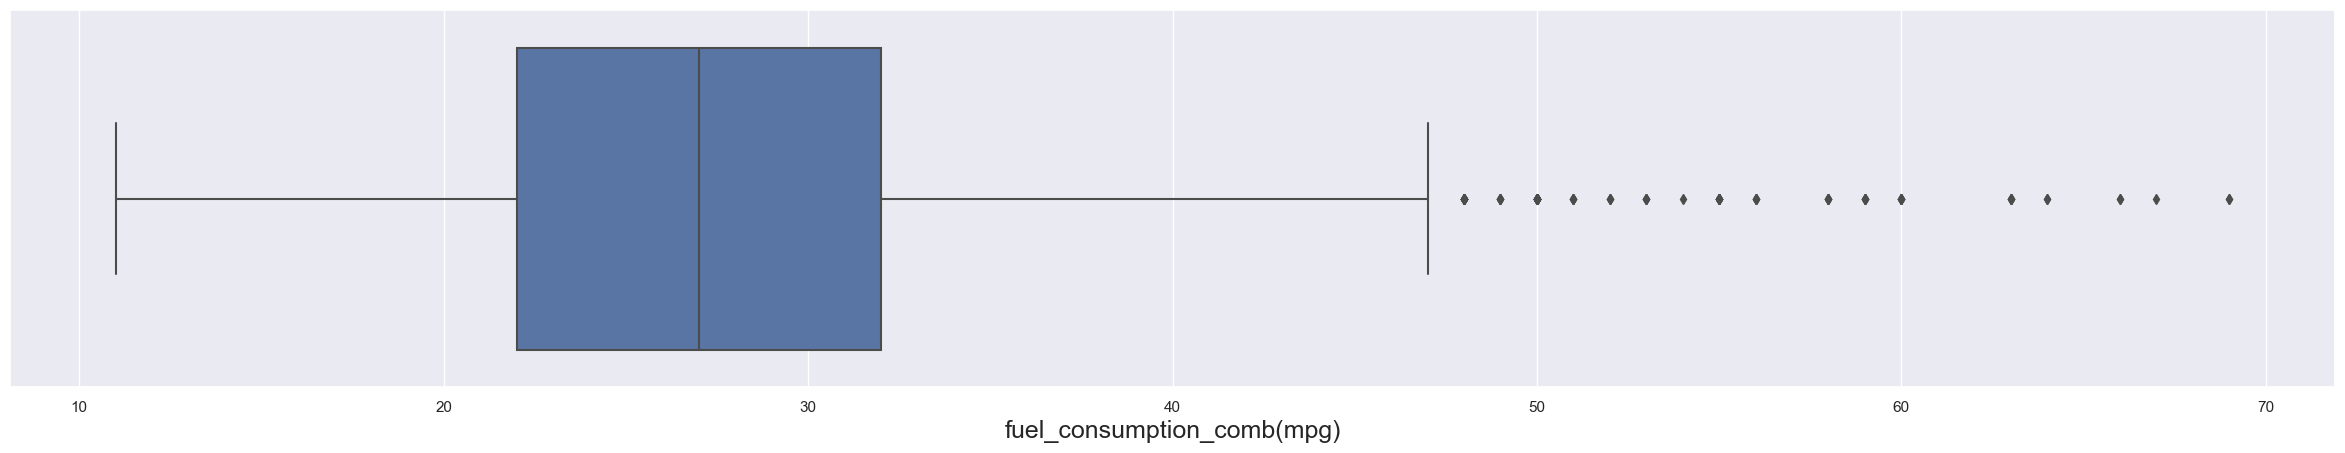

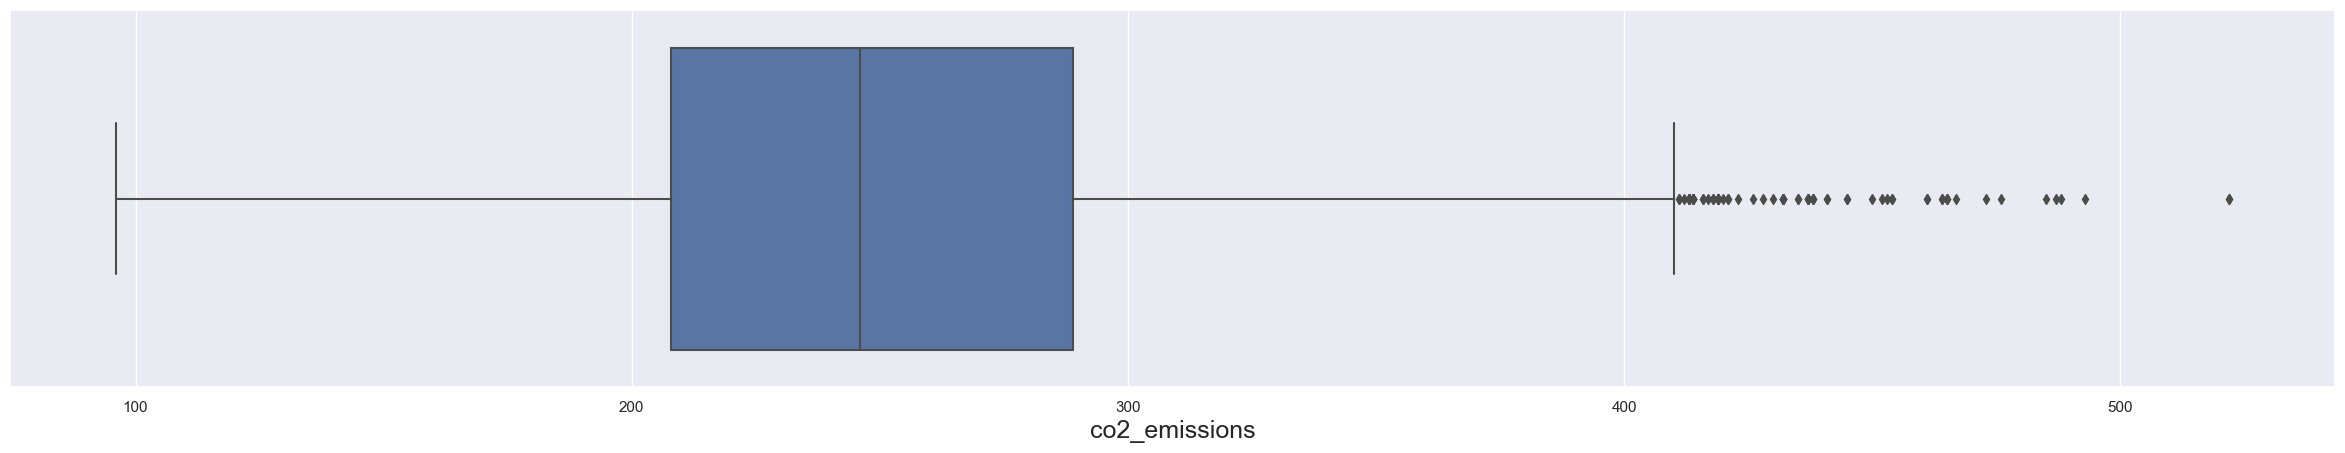

In [794]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

In [795]:
# # to know the position or indexes of outliers
outlier_indices = {}

for i in outlier.columns:
    outliers = outlier[outlier[i] == True].index.tolist()
    outlier_indices[i] = outliers

for key, value in outlier_indices.items():
    print(f"Outliers in column {key} are at index positions: {value}")


Outliers in column engine_size are at index positions: [36, 75, 290, 300, 301, 313, 349, 589, 637, 927, 928, 929, 930, 931, 932, 933, 945, 946, 1103, 1140, 1346, 1348, 1349, 1358, 1364, 1615, 1616, 1618, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 2038, 2061, 2298, 2300, 2301, 2302, 2313, 2318, 2337, 2604, 2661, 2662, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 3152, 3153, 3213, 3359, 3361, 3363, 3364, 3370, 3375, 3383, 3646, 3702, 3703, 3704, 3705, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 4137, 4195, 4290, 4489, 4511, 4512, 4513, 4514, 4709, 4710, 4711, 4712, 4713, 4714, 4828, 4876, 4891, 5006, 5008, 5021, 5029, 5285, 5321, 5322, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5825, 5929, 5931, 5932, 5935, 5936, 6112, 6203, 6204, 6205, 6206, 6207, 6208]
Outliers in column cylinders are at index positions: [13, 14, 19, 36, 47, 48, 51, 52, 70, 72, 73, 74, 112, 349, 637, 638, 639, 927, 928, 929, 930, 931, 932, 933, 945, 946, 1079, 1082, 1085, 1103, 1111, 1112, 1115, 1116, 1135, 1137, 1193, 

In [796]:
# replacing the outliers with mean in each column
for column in outlier_indices.keys():
    mean_value = df_num_features[column].mean()
    df_num_features.loc[outlier_indices[column], column] = mean_value


In [797]:
# checking the no of outliers
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column engine_size are 0
Total number of Outliers in column cylinders are 0
Total number of Outliers in column fuel_consumption_city are 0
Total number of Outliers in column fuel_consumption_hwy are 0
Total number of Outliers in column fuel_consumption_comb(l/100km) are 0
Total number of Outliers in column fuel_consumption_comb(mpg) are 0
Total number of Outliers in column co2_emissions are 0


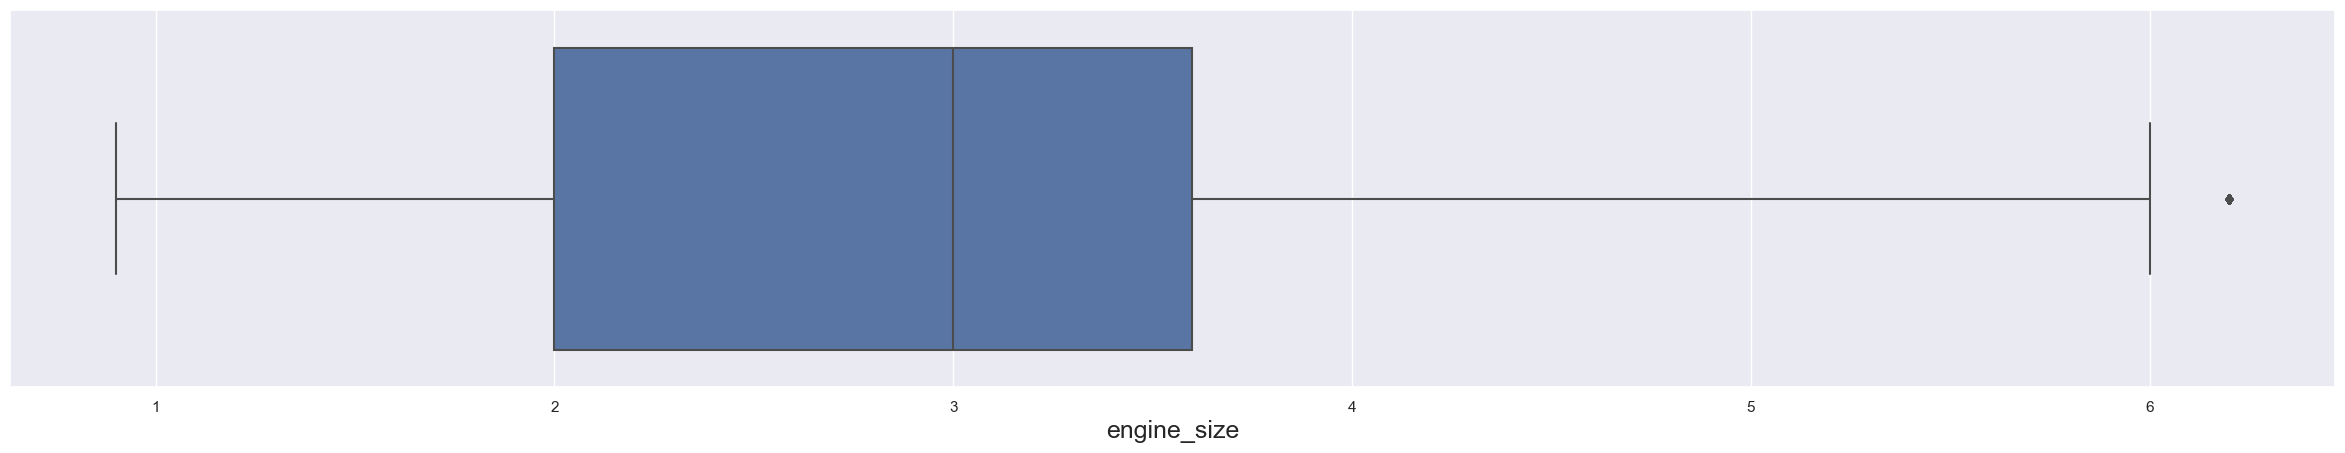

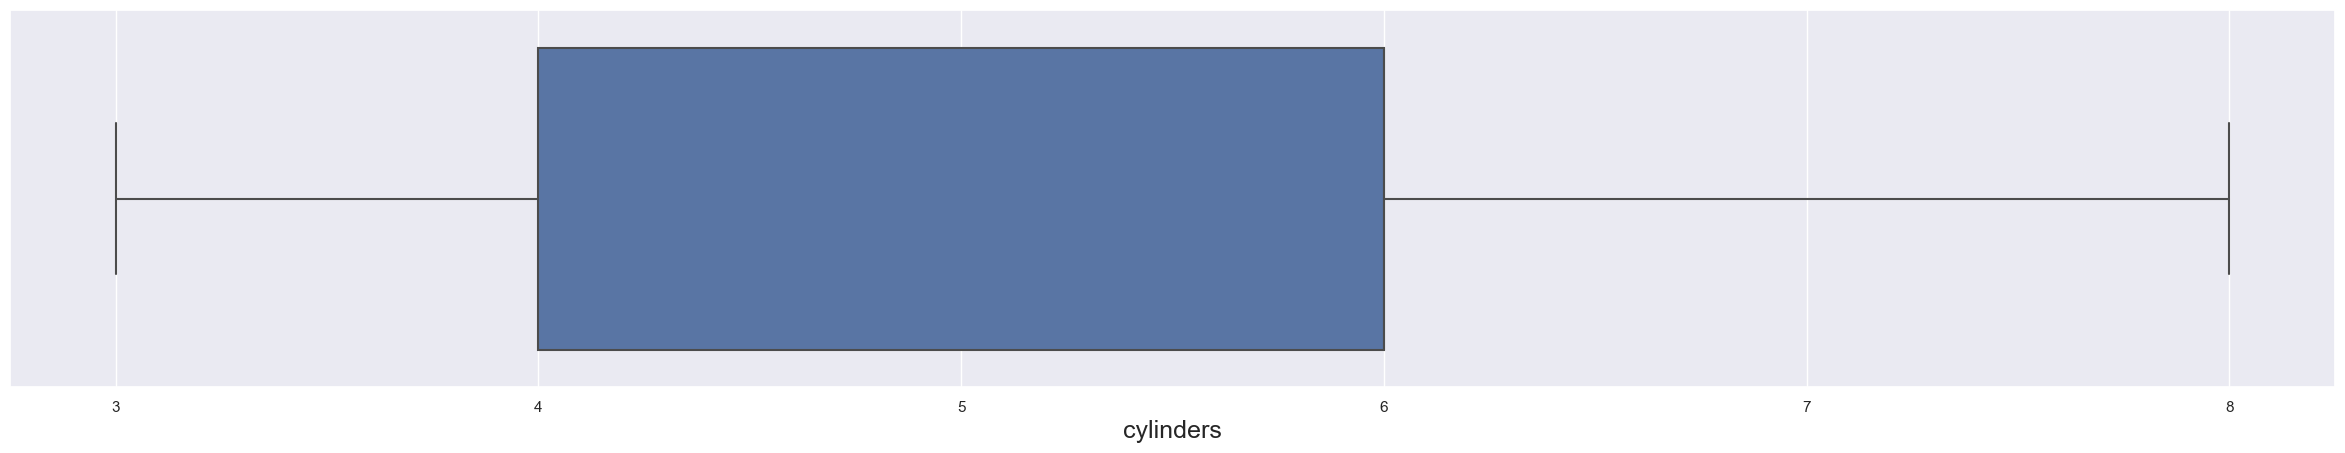

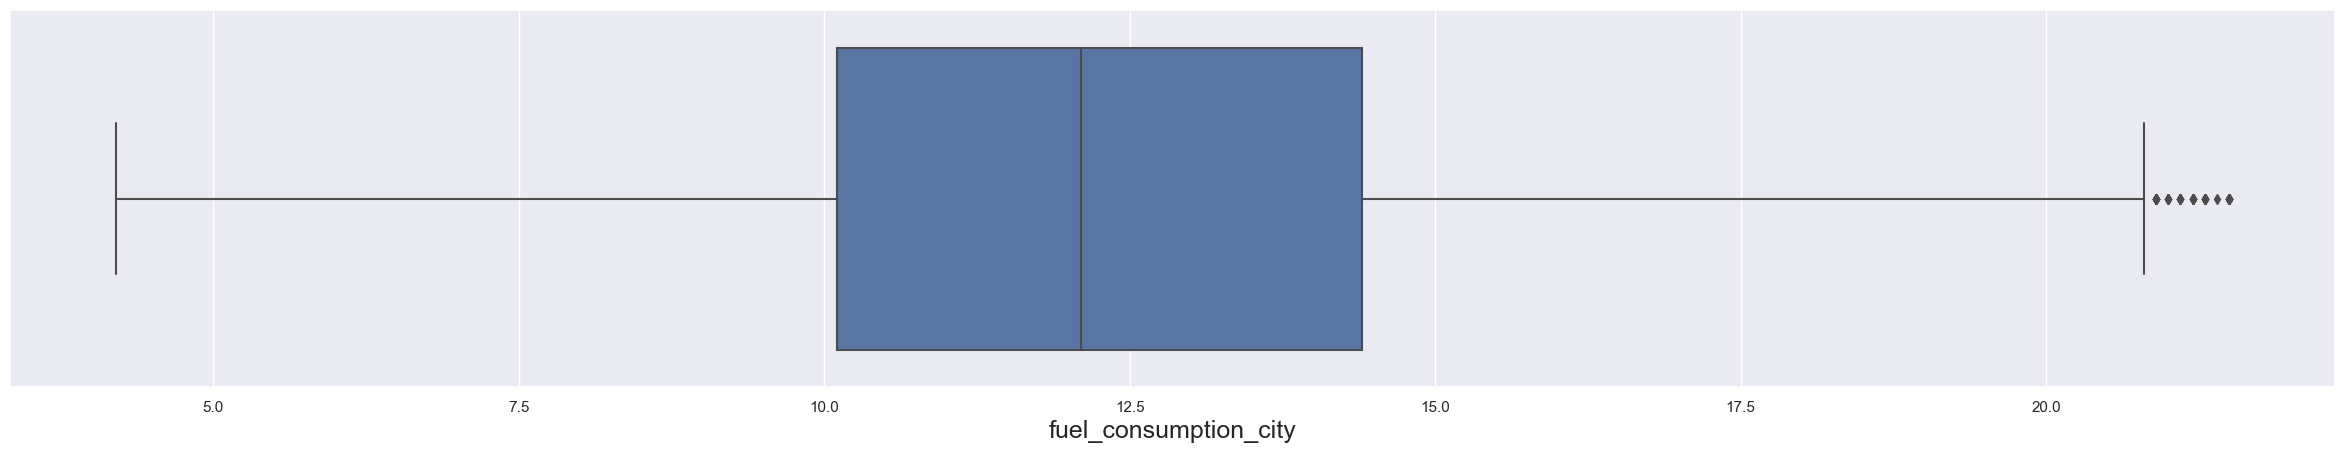

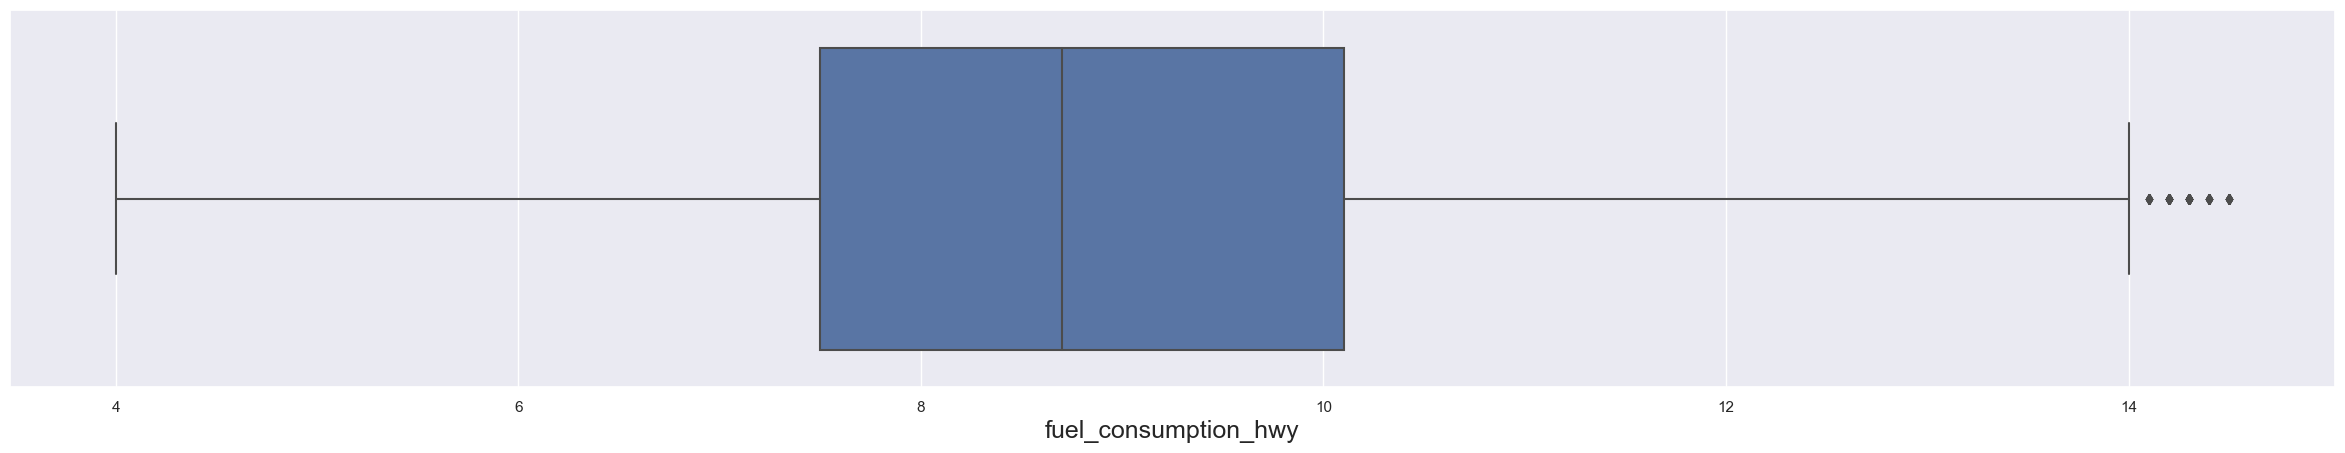

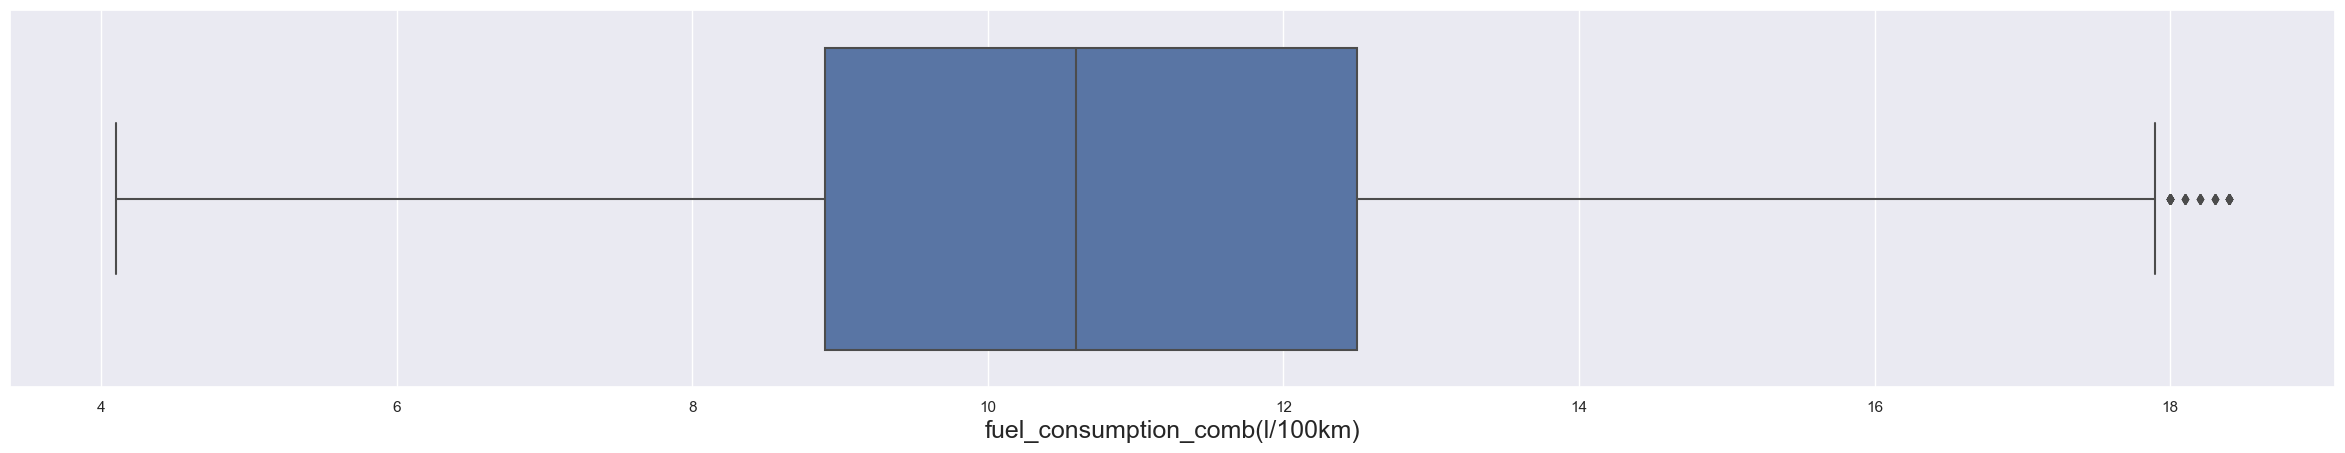

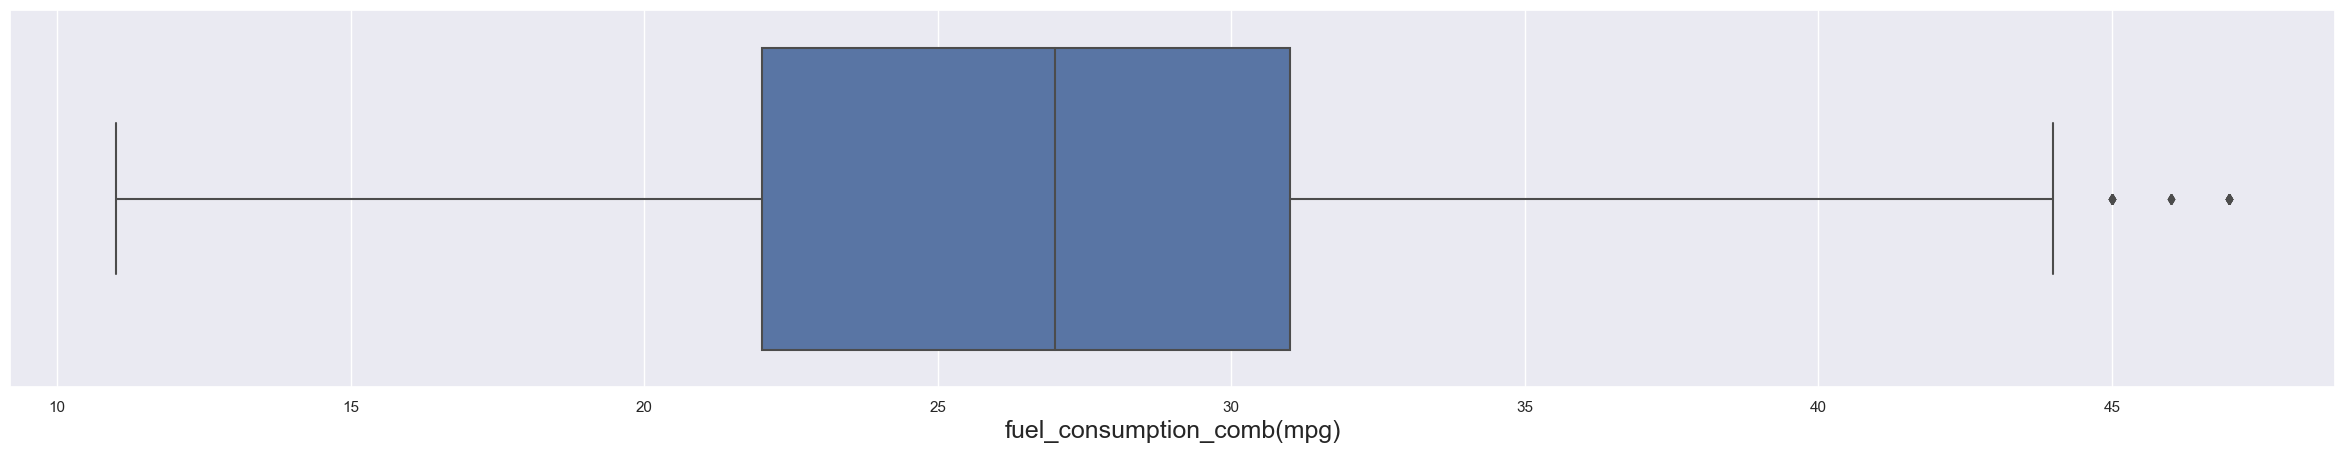

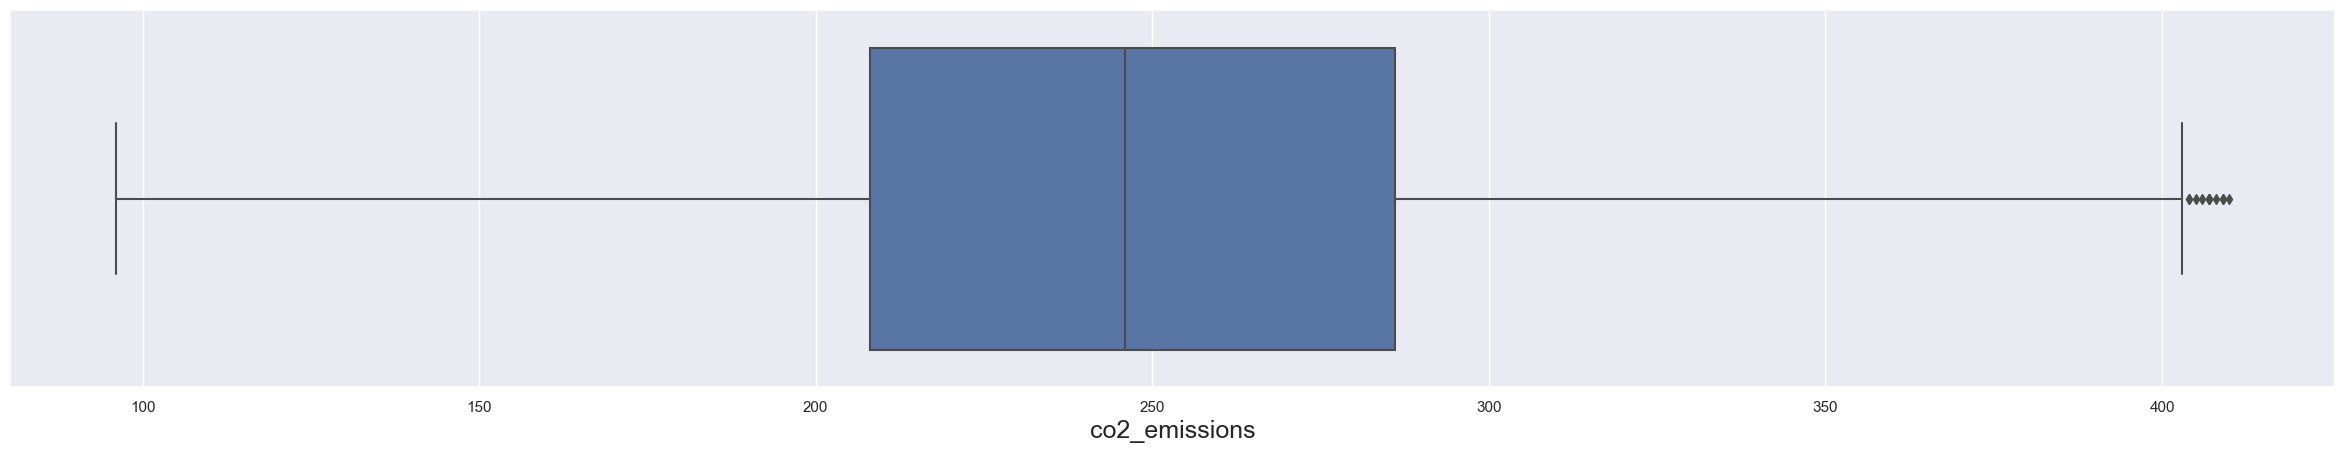

In [798]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

Text(0.5, 1.0, 'Correlation')

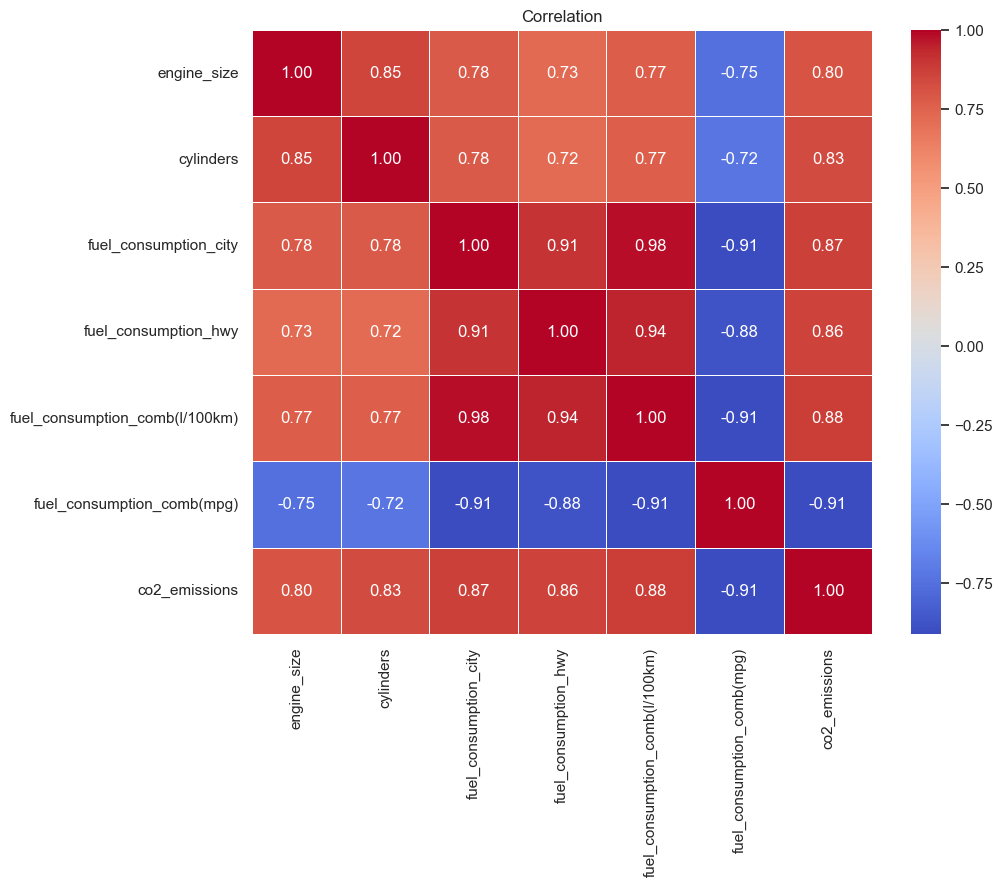

In [799]:
corr = data.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

In [800]:
data.shape

(6273, 12)

In [801]:
#Duplicate Data
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 4 duplicated rows in the data


In [802]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)

In [803]:
data.shape

(6269, 12)

# DATA PREPROCESSING

In [804]:
data.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

In [805]:
data['transmission'].value_counts()

AS    2720
A     1532
M     1019
AM     540
AV     458
Name: transmission, dtype: int64

In [806]:
data['fuel_type'].value_counts()

X    3028
Z    2765
E     328
D     147
N       1
Name: fuel_type, dtype: int64

In [807]:
# Dropping natural gas as there is only one data we have which would not make much difference in modelling

data_N = data[data['fuel_type']== 'N']

ind = data_N.index

data_N

make             model vehicle_class  engine_size  cylinders  \
2230  CHEVROLET  IMPALA DUAL FUEL      MID-SIZE          3.6          6   

     transmission fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
2230           AS         N                   15.2                   9.5   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
2230                            12.7                          22   

      co2_emissions  
2230            213

In [808]:
for i in ind:
    data.drop(i, axis=0, inplace=True)

In [809]:
data_N = data[data['fuel_type']== 'N']
data_N

Empty DataFrame
Columns: [make, model, vehicle_class, engine_size, cylinders, transmission, fuel_type, fuel_consumption_city, fuel_consumption_hwy, fuel_consumption_comb(l/100km), fuel_consumption_comb(mpg), co2_emissions]
Index: []

In [810]:
data_ft = pd.get_dummies(data['fuel_type'], prefix='Fuel', drop_first=True)
data_trans = pd.get_dummies(data["transmission"], drop_first=True)

In [811]:
data_ft

Fuel_E  Fuel_X  Fuel_Z
0          0       0       1
1          0       0       1
2          0       0       1
3          0       0       1
4          0       0       1
...      ...     ...     ...
6264       0       0       1
6265       0       0       1
6266       0       0       1
6267       0       0       1
6268       0       0       1

[6268 rows x 3 columns]

In [812]:
data_trans

AM  AS  AV  M
0      0   1   0  0
1      0   0   0  1
2      0   0   1  0
3      0   1   0  0
4      0   1   0  0
...   ..  ..  .. ..
6264   0   1   0  0
6265   0   1   0  0
6266   0   1   0  0
6267   0   1   0  0
6268   0   1   0  0

[6268 rows x 4 columns]

In [813]:
df = [data, data_ft,data_trans]

data = pd.concat(df, axis=1)
data.head()

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  \
0                             8.5                          33            196   
1                             9.6                          29            221   
2                             5.9                          48            136   
3                            11.1                          25            255   
4                            10.6                          27            244   

   Fuel_E  Fuel_X  Fuel_Z  AM  AS  AV  M  
0       0       0       1   0   1   0  0  
1       0       0       1   0   0   0  1  
2       0       0       1   0   0   1  0  
3       0       0       1   0   1   0  0  
4       0       0       1   0   1   0  0

In [814]:
data.drop(['fuel_type'], inplace=True, axis=1)
data.drop(['transmission'], inplace=True, axis=1)

In [815]:
data

make        model   vehicle_class  engine_size  cylinders  \
0     ACURA          ILX         COMPACT          2.0          4   
1     ACURA          ILX         COMPACT          2.4          4   
2     ACURA   ILX HYBRID         COMPACT          1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6   
...     ...          ...             ...          ...        ...   
6264  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4   
6265  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4   
6266  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4   
6267  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4   
6268  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4   

      fuel_consumption_city  fuel_consumption_hwy  \
0                       9.9                   6.7   
1                      11.2                   7.7   
2                       6.0                   5.8   
3                      12.7                   9.1   
4                      12.1                   8.7   
...                     ...                   ...   
6264                   10.7                   7.7   
6265                   11.2                   8.3   
6266                   11.7                   8.6   
6267                   11.2                   8.3   
6268                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
6264                             9.4                          30   
6265                             9.9                          29   
6266                            10.3                          27   
6267                             9.9                          29   
6268                            10.7                          26   

      co2_emissions  Fuel_E  Fuel_X  Fuel_Z  AM  AS  AV  M  
0               196       0       0       1   0   1   0  0  
1               221       0       0       1   0   0   0  1  
2               136       0       0       1   0   0   1  0  
3               255       0       0       1   0   1   0  0  
4               244       0       0       1   0   1   0  0  
...             ...     ...     ...     ...  ..  ..  .. ..  
6264            219       0       0       1   0   1   0  0  
6265            232       0       0       1   0   1   0  0  
6266            240       0       0       1   0   1   0  0  
6267            232       0       0       1   0   1   0  0  
6268            248       0       0       1   0   1   0  0  

[6268 rows x 17 columns]

In [816]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['make'] = label_encoder.fit_transform(data['make'])
data['model'] = label_encoder.fit_transform(data['model'])
data['vehicle_class'] = label_encoder.fit_transform(data['vehicle_class'])

In [817]:
data

make  model  vehicle_class  engine_size  cylinders  \
0        0   1057              0          2.0          4   
1        0   1057              0          2.4          4   
2        0   1058              0          1.5          4   
3        0   1233             11          3.5          6   
4        0   1499             11          3.5          6   
...    ...    ...            ...          ...        ...   
6264    41   1951             11          2.0          4   
6265    41   1957             11          2.0          4   
6266    41   1960             11          2.0          4   
6267    41   1968             12          2.0          4   
6268    41   1969             12          2.0          4   

      fuel_consumption_city  fuel_consumption_hwy  \
0                       9.9                   6.7   
1                      11.2                   7.7   
2                       6.0                   5.8   
3                      12.7                   9.1   
4                      12.1                   8.7   
...                     ...                   ...   
6264                   10.7                   7.7   
6265                   11.2                   8.3   
6266                   11.7                   8.6   
6267                   11.2                   8.3   
6268                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
6264                             9.4                          30   
6265                             9.9                          29   
6266                            10.3                          27   
6267                             9.9                          29   
6268                            10.7                          26   

      co2_emissions  Fuel_E  Fuel_X  Fuel_Z  AM  AS  AV  M  
0               196       0       0       1   0   1   0  0  
1               221       0       0       1   0   0   0  1  
2               136       0       0       1   0   0   1  0  
3               255       0       0       1   0   1   0  0  
4               244       0       0       1   0   1   0  0  
...             ...     ...     ...     ...  ..  ..  .. ..  
6264            219       0       0       1   0   1   0  0  
6265            232       0       0       1   0   1   0  0  
6266            240       0       0       1   0   1   0  0  
6267            232       0       0       1   0   1   0  0  
6268            248       0       0       1   0   1   0  0  

[6268 rows x 17 columns]

Text(0.5, 1.0, 'Correlation')

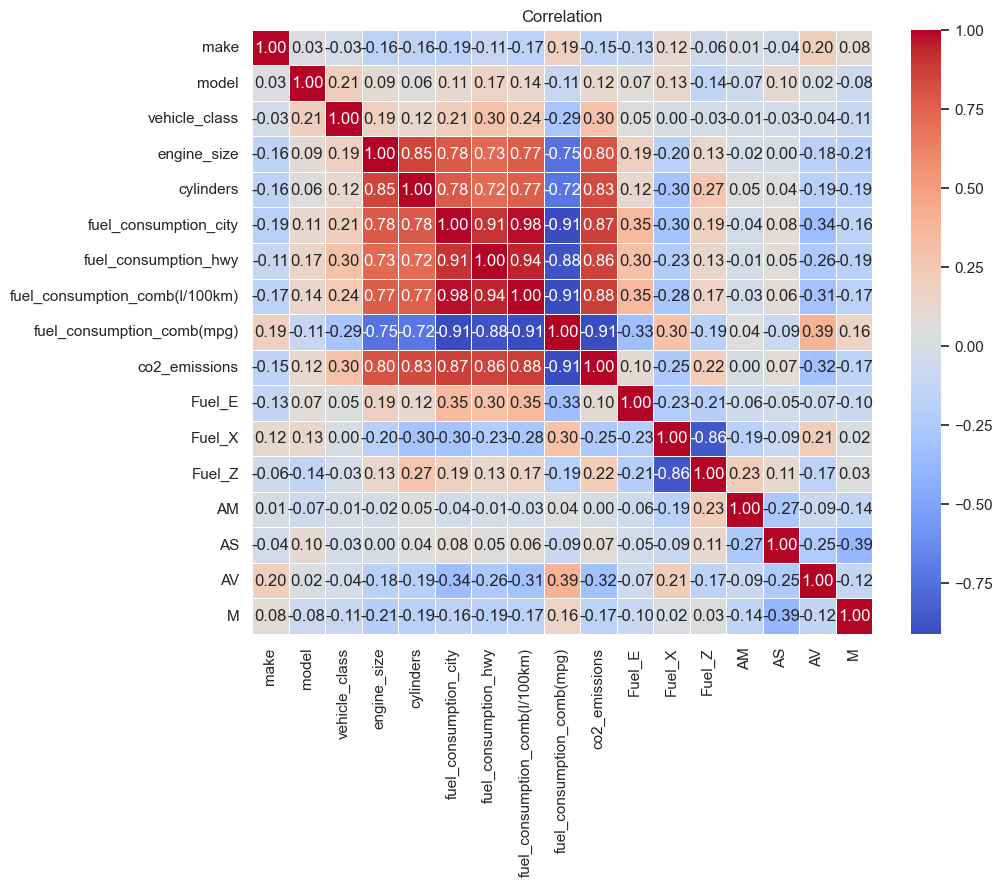

In [818]:
corr = data.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

In [819]:
data.dtypes


make                                int32
model                               int32
vehicle_class                       int32
engine_size                       float64
cylinders                           int64
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
Fuel_E                              uint8
Fuel_X                              uint8
Fuel_Z                              uint8
AM                                  uint8
AS                                  uint8
AV                                  uint8
M                                   uint8
dtype: object

In [820]:
data.describe()

make        model  vehicle_class  engine_size    cylinders  \
count  6268.000000  6268.000000    6268.000000  6268.000000  6268.000000   
mean     19.471442  1022.958679       6.331047     3.094021     5.619017   
std      11.442615   577.808497       4.827156     1.272139     1.846175   
min       0.000000     0.000000       0.000000     0.900000     3.000000   
25%       9.000000   531.000000       2.000000     2.000000     4.000000   
50%      17.000000   990.000000       6.000000     3.000000     6.000000   
75%      29.000000  1525.000000      11.000000     3.600000     6.000000   
max      41.000000  2052.000000      15.000000     6.200000    16.000000   

       fuel_consumption_city  fuel_consumption_hwy  \
count            6268.000000           6268.000000   
mean               12.410393              8.899190   
std                 3.195981              1.956155   
min                 4.200000              4.000000   
25%                10.100000              7.500000   
50%                12.100000              8.700000   
75%                14.400000             10.100000   
max                21.500000             14.500000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     6268.000000                 6268.000000   
mean                        10.848605                   27.403797   
std                          2.635319                    7.221241   
min                          4.100000                   11.000000   
25%                          8.900000                   22.000000   
50%                         10.600000                   27.000000   
75%                         12.500000                   32.000000   
max                         18.400000                   69.000000   

       co2_emissions       Fuel_E       Fuel_X       Fuel_Z           AM  \
count    6268.000000  6268.000000  6268.000000  6268.000000  6268.000000   
mean      251.174697     0.052329     0.483089     0.441130     0.086152   
std        59.157305     0.222708     0.499754     0.496562     0.280611   
min        96.000000     0.000000     0.000000     0.000000     0.000000   
25%       208.000000     0.000000     0.000000     0.000000     0.000000   
50%       246.000000     0.000000     0.000000     0.000000     0.000000   
75%       289.000000     0.000000     1.000000     1.000000     0.000000   
max       522.000000     1.000000     1.000000     1.000000     1.000000   

                AS           AV            M  
count  6268.000000  6268.000000  6268.000000  
mean      0.433791     0.073070     0.162572  
std       0.495636     0.260271     0.369004  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       1.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [821]:
# Split the dataset into X and y
X = data.drop(['co2_emissions'], axis=1)
y = data['co2_emissions']

In [822]:
X.head()

make  model  vehicle_class  engine_size  cylinders  fuel_consumption_city  \
0     0   1057              0          2.0          4                    9.9   
1     0   1057              0          2.4          4                   11.2   
2     0   1058              0          1.5          4                    6.0   
3     0   1233             11          3.5          6                   12.7   
4     0   1499             11          3.5          6                   12.1   

   fuel_consumption_hwy  fuel_consumption_comb(l/100km)  \
0                   6.7                             8.5   
1                   7.7                             9.6   
2                   5.8                             5.9   
3                   9.1                            11.1   
4                   8.7                            10.6   

   fuel_consumption_comb(mpg)  Fuel_E  Fuel_X  Fuel_Z  AM  AS  AV  M  
0                          33       0       0       1   0   1   0  0  
1                          29       0       0       1   0   0   0  1  
2                          48       0       0       1   0   0   1  0  
3                          25       0       0       1   0   1   0  0  
4                          27       0       0       1   0   1   0  0

In [823]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: co2_emissions, dtype: int64

In [824]:
data.shape

(6268, 17)

# FEATURE SELECTION USING CHI-SQUARE TEST

In [825]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [826]:
ranked_feature = SelectKBest(score_func = chi2, k='all')
ordered_feature = ranked_feature.fit(X, y)

In [827]:
top_feat = pd.DataFrame(ordered_feature.scores_ , columns=['score'])
top_feat['variables'] = X.columns

In [828]:
top_feat.sort_values(by='score', ascending=False)

score                       variables
1   204519.659868                           model
8    11207.276846      fuel_consumption_comb(mpg)
0     5248.913626                            make
5     4408.102533           fuel_consumption_city
2     4177.691753                   vehicle_class
7     3453.183000  fuel_consumption_comb(l/100km)
4     2957.908496                       cylinders
3     2475.453366                     engine_size
6     2213.368686            fuel_consumption_hwy
14    1592.346701                              AV
12     797.673663                              AM
9      724.050915                          Fuel_E
15     642.817217                               M
11     610.563587                          Fuel_Z
10     556.966940                          Fuel_X
13     412.324236                              AS

In [829]:
# Import the necessary libraries
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


In [830]:
# Perform feature selection using SelectKBest and chi2
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


In [831]:
selected_features

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'fuel_consumption_city', 'fuel_consumption_hwy',
       'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)', 'AV'],
      dtype='object')

In [832]:
# Perform feature selection using SelectFromModel and LassoCV
lasso = LassoCV()
lasso.fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X)
selected_features1 = X.columns[model.get_support()]


In [833]:
selected_features1

Index(['make', 'model', 'vehicle_class', 'cylinders', 'fuel_consumption_hwy',
       'fuel_consumption_comb(mpg)'],
      dtype='object')

In [834]:
# Perform feature selection using RandomForestRegressor and feature importance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
rf = RandomForestRegressor()
rf.fit(X_scaled, y)
importances = rf.feature_importances_
selected_features2 = X.columns[np.argsort(importances)[::-1]][:10]

In [835]:
selected_features2

Index(['fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)',
       'Fuel_E', 'fuel_consumption_city', 'cylinders', 'model', 'engine_size',
       'fuel_consumption_hwy', 'Fuel_X', 'vehicle_class'],
      dtype='object')

# CREATING TRAINING SET AND TESTING SET

In [836]:
# splitting of traing testing set into X and y

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [837]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5014, 16)
(1254, 16)
(5014,)
(1254,)


In [838]:
y_test.head()

3159    206
1345    320
6111    370
5533    188
2522    312
Name: co2_emissions, dtype: int64

# FEATURE SCALING USING STANDARDIZATION

In [839]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

In [840]:
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [841]:
X_train

array([[ 1.00525484,  1.06707052, -0.90241017, ..., -0.87456934,
        -0.28472693,  2.27149844],
       [ 1.61881971,  0.07432957, -1.31711936, ..., -0.87456934,
         3.51213701, -0.44023803],
       [ 0.12873359, -0.18381773, -1.31711936, ..., -0.87456934,
        -0.28472693, -0.44023803],
       ...,
       [-0.2218749 ,  1.23685868, -1.10976477, ...,  1.14341992,
        -0.28472693, -0.44023803],
       [ 0.65464634,  0.45028906, -0.90241017, ..., -0.87456934,
        -0.28472693,  2.27149844],
       [ 1.00525484,  0.85223653,  0.96378118, ..., -0.87456934,
         3.51213701, -0.44023803]])

In [842]:
X_test

array([[-1.2737004 , -1.67379542, -1.31711936, ...,  1.14341992,
        -0.28472693, -0.44023803],
       [-0.74778765, -0.96172469, -0.90241017, ..., -0.87456934,
        -0.28472693,  2.27149844],
       [ 0.21638572,  0.05700425,  1.37849037, ..., -0.87456934,
        -0.28472693, -0.44023803],
       ...,
       [-1.2737004 , -1.49707714,  0.75642658, ..., -0.87456934,
        -0.28472693, -0.44023803],
       [ 1.09290696, -1.38792761, -0.69505558, ..., -0.87456934,
        -0.28472693, -0.44023803],
       [ 0.47934209,  0.3879179 , -1.10976477, ...,  1.14341992,
        -0.28472693, -0.44023803]])

# MODEL BUILDING

# LINEAR REGRESSION

In [843]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [844]:
model.intercept_

250.96330275229357

In [845]:
model.coef_

array([  0.16410615,   0.51861635,   2.76870828,   0.59104603,
        16.96773692,  -4.72720605,   5.29180706,  11.66363479,
       -34.17240125, -17.89762059, -13.04492446, -14.82090576,
         0.51650879,  -0.58569919,   0.33311579,   0.3371231 ])

In [846]:
y_pred = model.predict(X_test)
y_pred

array([197.01544209, 317.33274804, 367.13944405, ..., 307.52416854,
       270.90111375, 282.10732318])

In [847]:
np.sqrt(mean_squared_error(y_test, y_pred))

15.425344844792543

In [848]:
r2_score(y_test, y_pred)

0.9327804186630613

In [849]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [850]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

pred_values  real_values
0          197.02        206.0
1          317.33        320.0
2          367.14        370.0
3          195.69        188.0
4          309.46        312.0
...           ...          ...
1249       198.39        202.0
1250       194.49        197.0
1251       307.52        292.0
1252       270.90        266.0
1253       282.11        293.0

[1254 rows x 2 columns]

In [851]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])

print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  9.457743221690597


In [852]:
lin_pred.head(10)

pred_values  real_values   diff
0       197.02        206.0   8.98
1       317.33        320.0   2.67
2       367.14        370.0   2.86
3       195.69        188.0   7.69
4       309.46        312.0   2.54
5       270.53        297.0  26.47
6       256.41        253.0   3.41
7       239.89        216.0  23.89
8       248.25        245.0   3.25
9       154.72        162.0   7.28

<AxesSubplot: xlabel='co2_emissions', ylabel='Density'>

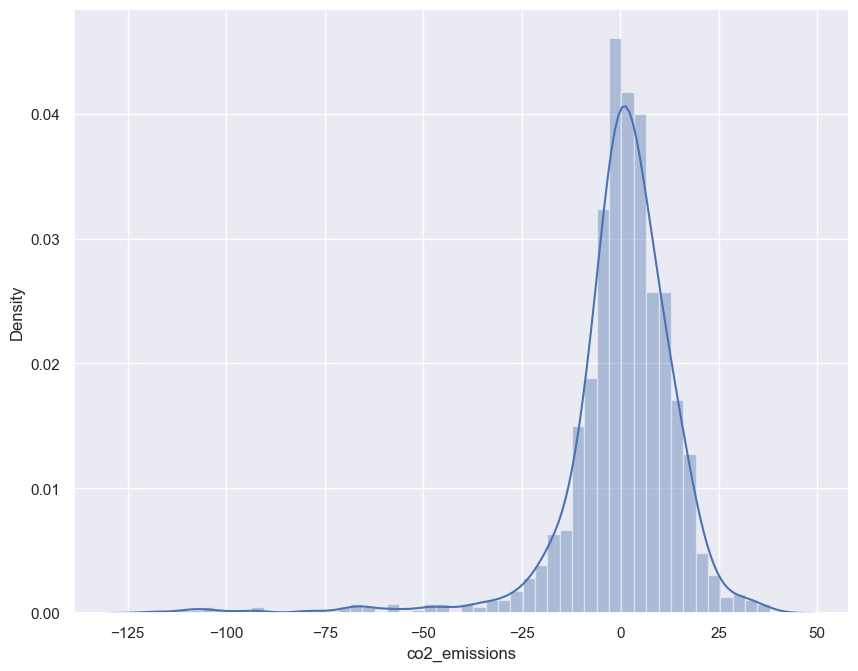

In [853]:
sns.distplot(y_pred-y_test)

Text(0, 0.5, 'y_pred')

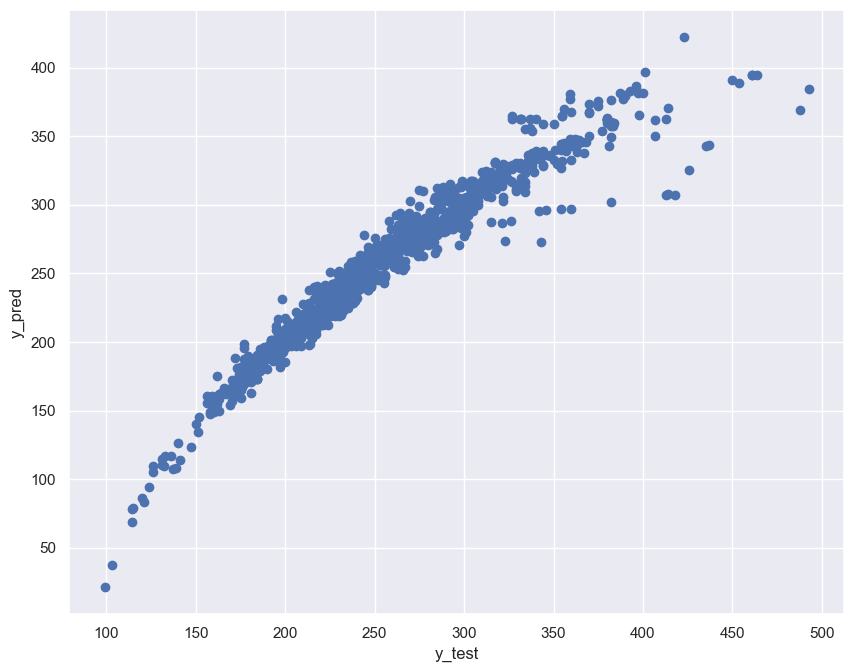

In [854]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

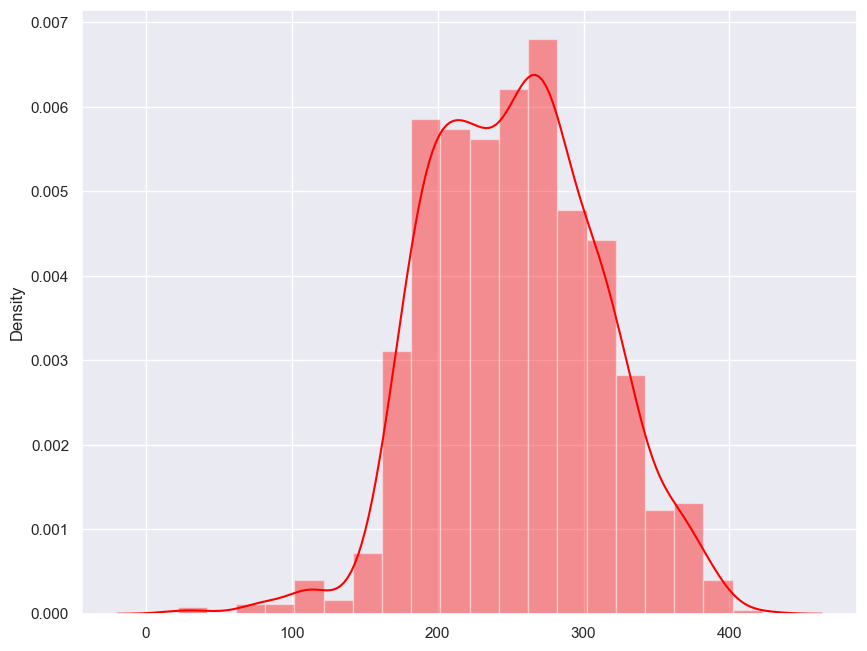

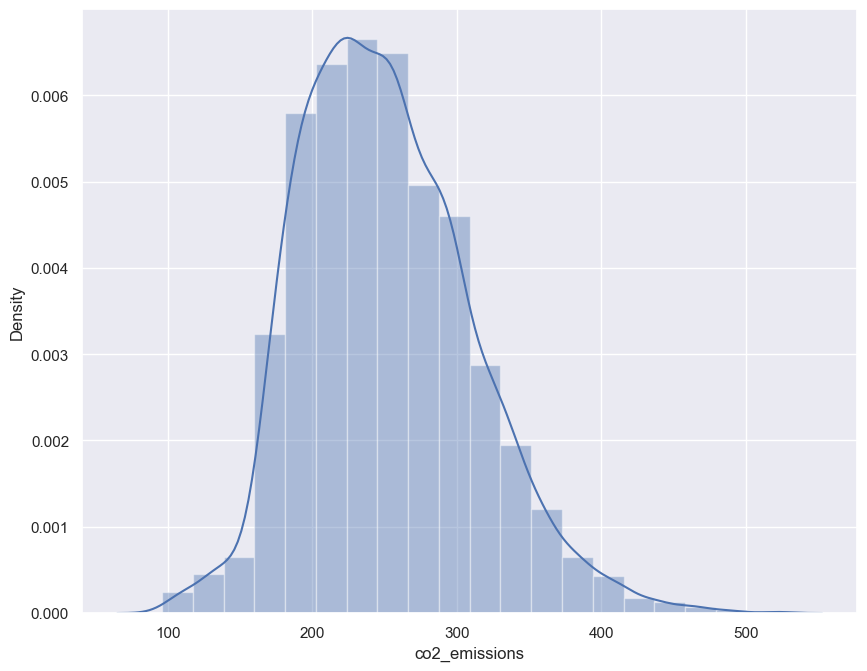

In [855]:
sns.distplot(y_pred, bins=20,color='red')
plt.show()
sns.distplot(data['co2_emissions'], bins=20)
plt.show()

# RIDGE REGRESSION

In [856]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [857]:
model.intercept_

250.96330275229357

In [858]:
model.coef_

array([  0.16422542,   0.51849487,   2.76933839,   0.59237361,
        16.9664885 ,  -4.7129709 ,   5.29572257,  11.64965115,
       -34.16673895, -17.89282345, -13.0358481 , -14.81141823,
         0.51613262,  -0.58608772,   0.33215168,   0.33650116])

In [859]:
y_ridge = model.predict(X_test)
y_ridge

array([197.01664186, 317.33135096, 367.13986557, ..., 307.5255002 ,
       270.89995102, 282.10663698])

In [860]:
np.sqrt(mean_squared_error(y_ridge,y_test))

15.42516513860741

In [861]:
r2_score(y_test,y_ridge)

0.9327819848781812

In [862]:
frames = [y_ridge, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

0      1
0     197.016642  206.0
1     317.331351  320.0
2     367.139866  370.0
3     195.685216  188.0
4     309.459235  312.0
...          ...    ...
1249  198.393808  202.0
1250  194.487745  197.0
1251  307.525500  292.0
1252  270.899951  266.0
1253  282.106637  293.0

[1254 rows x 2 columns]

In [863]:
ridge_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
ridge_pred['pred_values'] = (ridge_pred['pred_values'].map(lambda x: round(x,2)))

ridge_pred['diff'] = abs(ridge_pred['real_values'] -ridge_pred['pred_values'])


print('mean diff: ', abs(ridge_pred['diff']).mean())

mean diff:  9.457416267942596


In [864]:
ridge_pred.head(10)

pred_values  real_values   diff
0       197.02        206.0   8.98
1       317.33        320.0   2.67
2       367.14        370.0   2.86
3       195.69        188.0   7.69
4       309.46        312.0   2.54
5       270.53        297.0  26.47
6       256.41        253.0   3.41
7       239.89        216.0  23.89
8       248.24        245.0   3.24
9       154.72        162.0   7.28

<AxesSubplot: xlabel='co2_emissions', ylabel='Density'>

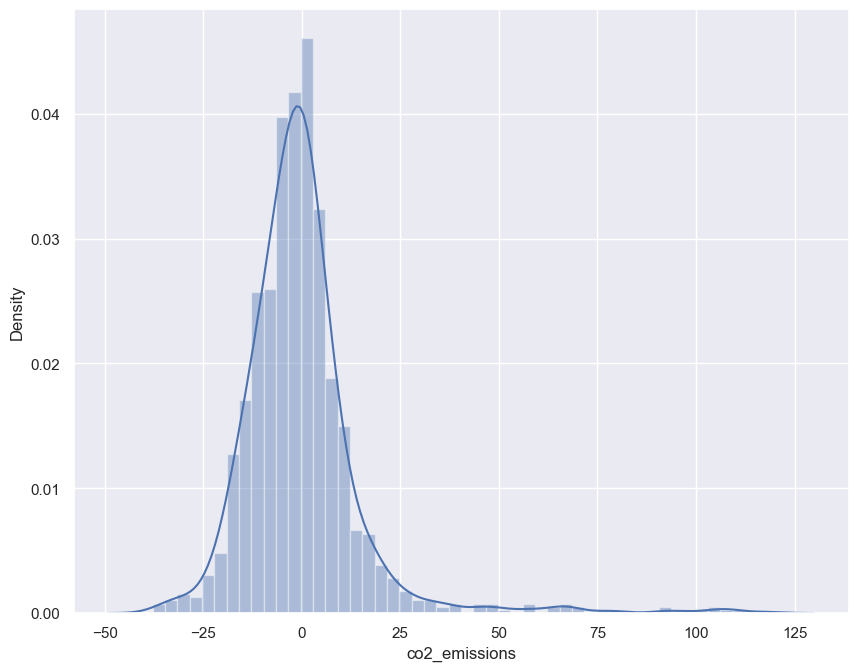

In [865]:
sns.distplot(y_test-y_ridge)

Text(0, 0.5, 'y_ridge')

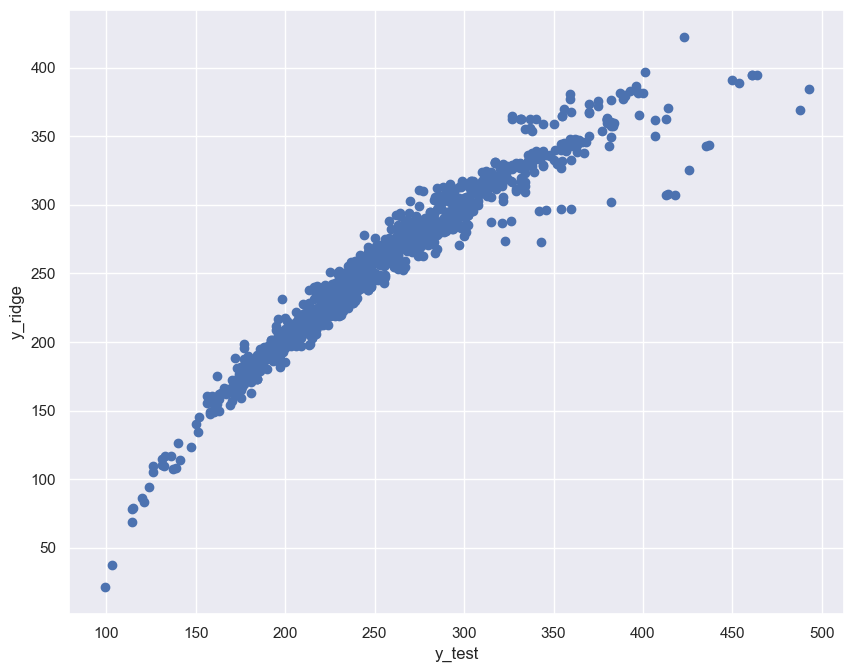

In [866]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_ridge')

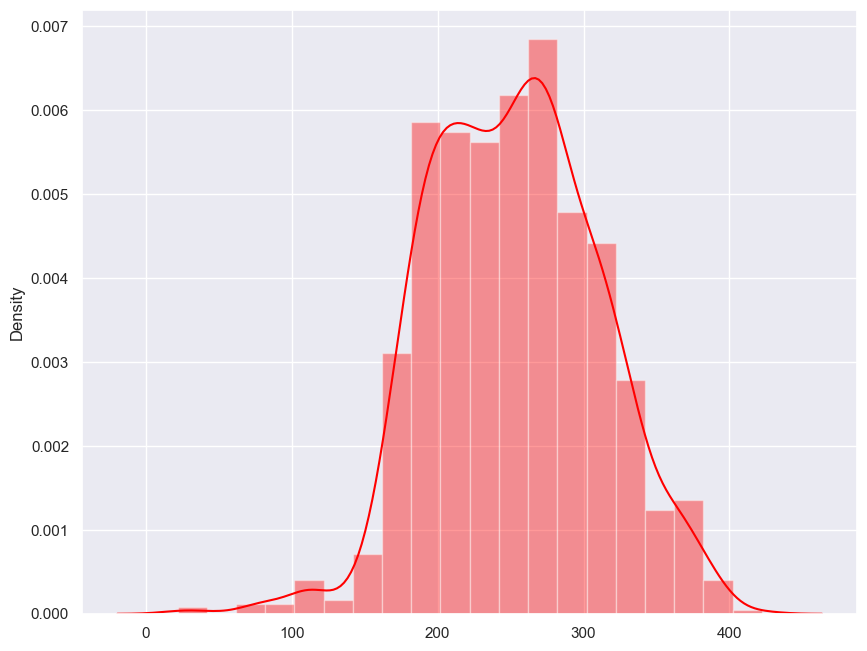

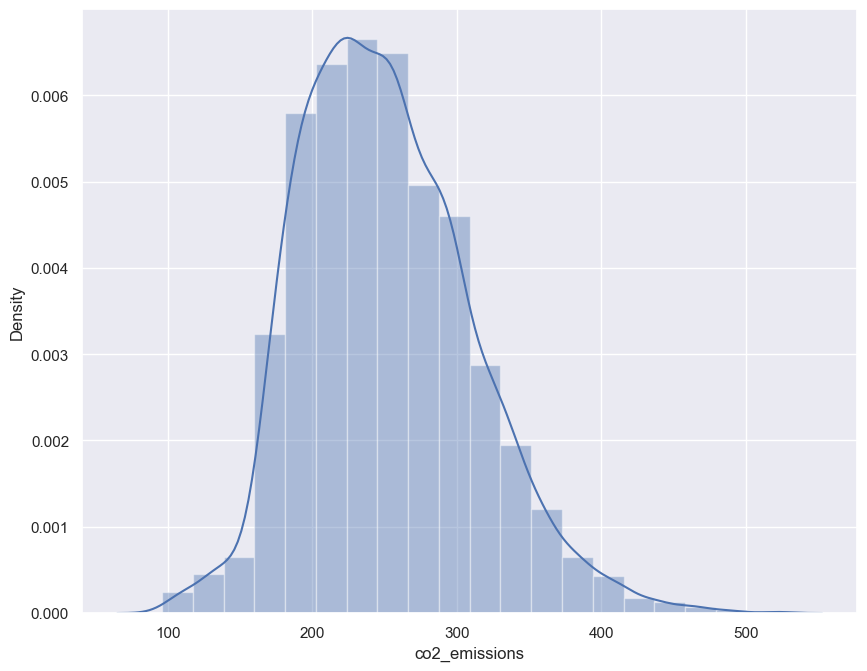

In [867]:
sns.distplot(y_ridge, bins=20,color='red')
plt.show()
sns.distplot(data['co2_emissions'], bins=20)
plt.show()

# LASSO REGRESSION

In [868]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [869]:
model.coef_

array([ 1.49247416e-01,  4.17449195e-01,  2.87432723e+00,  4.33540507e-01,
        1.69270340e+01, -0.00000000e+00,  6.12365137e+00,  6.69084052e+00,
       -3.33477151e+01, -1.63006316e+01, -9.83454397e+00, -1.15828491e+01,
        2.64868852e-01, -7.64035183e-01,  8.44190752e-03,  0.00000000e+00])

In [870]:
y_lasso_pred = model.predict(X_test)
y_lasso_pred

array([197.92400941, 317.54788157, 366.42587033, ..., 308.30857063,
       269.9977759 , 282.21686251])

In [871]:
np.sqrt(mean_squared_error(y_test,y_lasso_pred ))

15.3905211889158

In [872]:
r2_score(y_lasso_pred, y_test)

0.9274299786215602

In [873]:
frames = [y_lasso_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

0      1
0     197.924009  206.0
1     317.547882  320.0
2     366.425870  370.0
3     195.001057  188.0
4     309.595744  312.0
...          ...    ...
1249  199.059392  202.0
1250  194.333115  197.0
1251  308.308571  292.0
1252  269.997776  266.0
1253  282.216863  293.0

[1254 rows x 2 columns]

In [874]:
lasso_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
lasso_pred['pred_values'] = (lasso_pred['pred_values'].map(lambda x: round(x,2)))

lasso_pred['diff'] = abs(lasso_pred['real_values'] -lasso_pred['pred_values'])


print('mean diff: ', abs(lasso_pred['diff']).mean())

mean diff:  9.467687400318994


In [875]:
lasso_pred.head(10)

pred_values  real_values   diff
0       197.92        206.0   8.08
1       317.55        320.0   2.45
2       366.43        370.0   3.57
3       195.00        188.0   7.00
4       309.60        312.0   2.40
5       269.55        297.0  27.45
6       256.88        253.0   3.88
7       239.87        216.0  23.87
8       247.85        245.0   2.85
9       155.02        162.0   6.98

<AxesSubplot: xlabel='co2_emissions', ylabel='Density'>

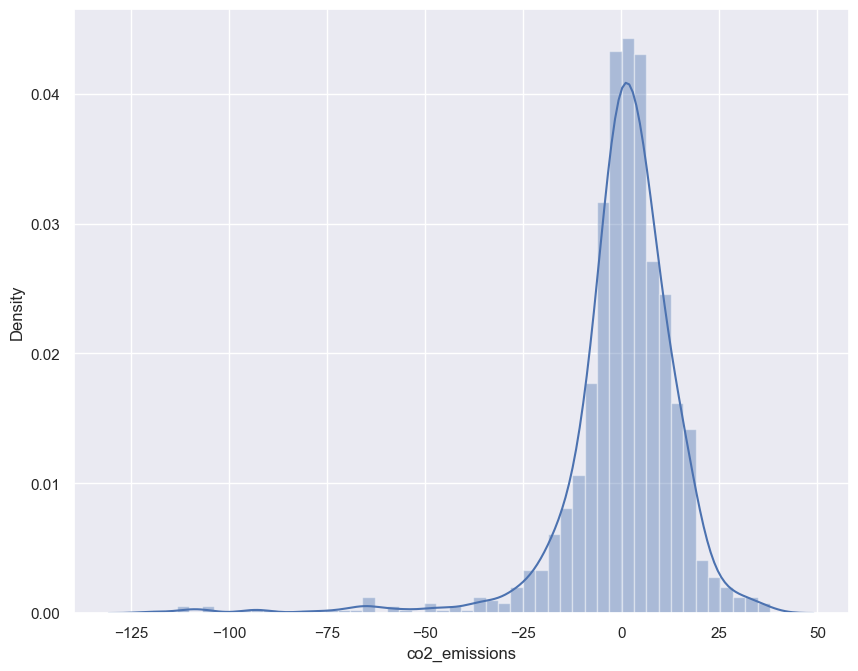

In [876]:
sns.distplot(y_lasso_pred-y_test)

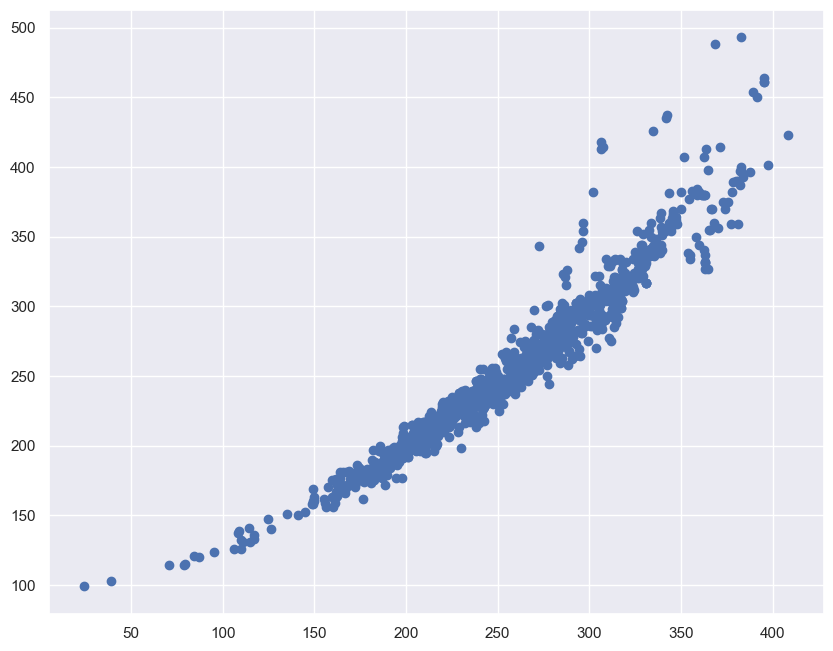

In [877]:
plt.scatter(y_lasso_pred, y_test)

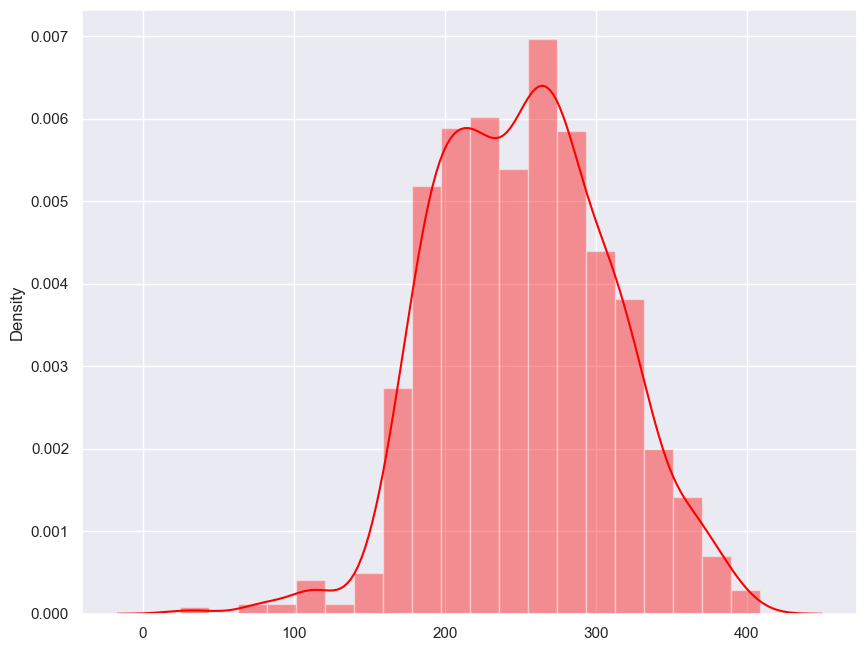

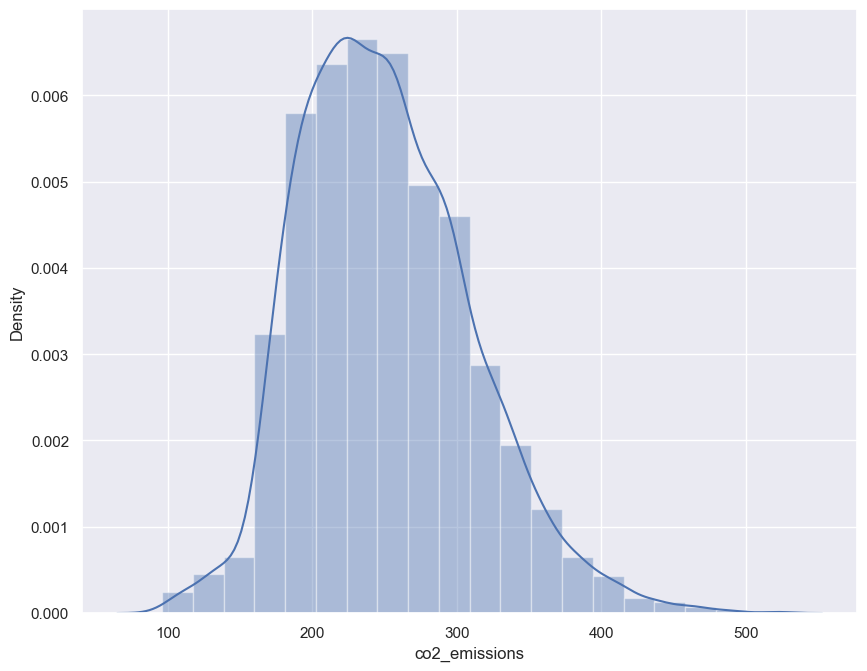

In [878]:
sns.distplot(y_lasso_pred, bins=20,color='red')
plt.show()
sns.distplot(data['co2_emissions'], bins=20)
plt.show()

In [879]:
model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [880]:
dtr_pred = model.predict(X_test)
dtr_pred

array([207., 326., 370., ..., 292., 266., 293.])

In [881]:
np.sqrt(mean_squared_error(y_test,dtr_pred ))

4.998703978763358

In [882]:
r2_score(y_test, dtr_pred)

0.9929410374602352

In [883]:
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

0      1
0  207.0  206.0
1  326.0  320.0
2  370.0  370.0
3  184.0  188.0
4  306.0  312.0

In [884]:
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))

dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])


print('mean diff: ', abs(dtr_pred['diff']).mean())

mean diff:  2.56658692185008


In [885]:
dtr_pred.head(10)

pred_values  real_values  diff
0        207.0        206.0   1.0
1        326.0        320.0   6.0
2        370.0        370.0   0.0
3        184.0        188.0   4.0
4        306.0        312.0   6.0
5        296.0        297.0   1.0
6        256.0        253.0   3.0
7        249.0        216.0  33.0
8        246.0        245.0   1.0
9        160.5        162.0   1.5

# RANDOM FOREST

In [886]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [887]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([205.99 , 324.69 , 369.75 , ..., 293.97 , 266.66 , 292.164])

In [888]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))

RMSE: 4.2041
MAE: 2.4664
R2_score: 0.9950


In [889]:
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

0      1
0  205.990000  206.0
1  324.690000  320.0
2  369.750000  370.0
3  186.648333  188.0
4  307.050000  312.0

In [890]:
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  2.466459330143543


In [891]:
y_rf_pred.head(10)

pred_values  real_values   diff
0       205.99        206.0   0.01
1       324.69        320.0   4.69
2       369.75        370.0   0.25
3       186.65        188.0   1.35
4       307.05        312.0   4.95
5       295.42        297.0   1.58
6       255.06        253.0   2.06
7       235.86        216.0  19.86
8       246.30        245.0   1.30
9       161.60        162.0   0.40

# SIMPLE VECTOR MACHINE

In [892]:
model = LinearSVR()
model.fit(X_train, y_train)
y_svr_pred = model.predict(X_test)
y_svr_pred

array([204.76931062, 323.12171097, 365.13406538, ..., 296.85034002,
       266.01326834, 290.78347931])

In [893]:
np.sqrt(mean_squared_error(y_svr_pred,y_test))

25.341728784751407

In [894]:
r2_score(y_svr_pred,y_test)

0.7972248735074379

In [895]:
frames = [y_svr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

0      1
0  204.769311  206.0
1  323.121711  320.0
2  365.134065  370.0
3  187.128356  188.0
4  309.872184  312.0

In [896]:
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))

y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])


print('mean diff: ', abs(y_svr_pred['diff']).mean())

mean diff:  5.930263157894737


In [897]:
y_svr_pred.head(10)

pred_values  real_values  diff
0       204.77        206.0  1.23
1       323.12        320.0  3.12
2       365.13        370.0  4.87
3       187.13        188.0  0.87
4       309.87        312.0  2.13
5       293.64        297.0  3.36
6       257.42        253.0  4.42
7       219.12        216.0  3.12
8       245.84        245.0  0.84
9       160.53        162.0  1.47

In [898]:
models =['LinReg','LasReg','RidReg','DT', 'RF',"SVR"]

frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})




for i in range(len(models)):
    if models[i] == 'LinReg':
        model = LinearRegression()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='LasReg':
        model = Lasso(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Lasso Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RidReg':
        model = Ridge(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Ridge Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='DT':
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RF':
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
       
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    else :
        models[i] =='SVM'
        model = LinearSVR()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Support Vector Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

OVERALL PERFORMANCE OF ALL MODELS IN A DATAFRAME

In [899]:
frame

models  rmse_train  mae_train  r2_train  rmse_test  \
0          Linear Regression   15.097961   9.590423  0.934659  15.425345   
1           Lasso Regression   15.148879   9.613753  0.934218  15.390521   
2           Ridge Regression   15.097961   9.590269  0.934659  15.425165   
3   Decision Tree Regression    0.959508   0.316647  0.999736   5.253843   
4   Random Forest Regression    1.643500   1.003121  0.999226   4.210382   
5  Support Vector Regression   23.455064   5.672929  0.842304  25.326018   

   mae_test   r2_test  
0  9.457807  0.932780  
1  9.467769  0.933084  
2  9.457541  0.932782  
3  2.599681  0.992202  
4  2.497412  0.994992  
5  5.930994  0.818799

# project to predicting co2 emission can be easily done by regressor models lets try some neural network models

In [900]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error on test set:', loss)

Epoch 1/100
157/157 [==============================] - 1s 1ms/step - loss: 64425.5977
Epoch 2/100
157/157 [==============================] - 0s 1ms/step - loss: 42633.0820
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 13101.5869
Epoch 4/100
157/157 [==============================] - 0s 1ms/step - loss: 6166.0054
Epoch 5/100
157/157 [==============================] - 0s 1ms/step - loss: 3244.8838
Epoch 6/100
157/157 [==============================] - 0s 1ms/step - loss: 1776.6854
Epoch 7/100
157/157 [==============================] - 0s 1ms/step - loss: 1066.8619
Epoch 8/100
157/157 [==============================] - 0s 3ms/step - loss: 711.0757
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 516.1815
Epoch 10/100
157/157 [==============================] - 0s 1ms/step - loss: 393.4111
Epoch 11/100
157/157 [==============================] - 0s 2ms/step - loss: 307.3001
Epoch 12/100
157/157 [==============================] - 0s 2ms/s

In [901]:
#LSTM model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


# Reshape the features for LSTM input
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(1, X_train.shape[1])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print('Mean Squared Error on test set:', loss)

# Predict CO2 emission values for the test set
predictions = model.predict(X_test_reshaped)

# Print the predicted CO2 emission values
print('Predicted CO2 Emission Values:')
for prediction in predictions:
    print(prediction[0])

Epoch 1/100
157/157 [==============================] - 3s 2ms/step - loss: 66027.6875
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 64346.3906
Epoch 3/100
157/157 [==============================] - 0s 3ms/step - loss: 62470.3438
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 60665.1602
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 58854.0000
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 56952.5078
Epoch 7/100
157/157 [==============================] - 0s 3ms/step - loss: 54807.8633
Epoch 8/100
157/157 [==============================] - 0s 3ms/step - loss: 52125.0156
Epoch 9/100
157/157 [==============================] - 0s 3ms/step - loss: 49196.1758
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 46604.9375
Epoch 11/100
157/157 [==============================] - 0s 2ms/step - loss: 44350.5078
Epoch 12/100
157/157 [==============================